In [8]:
import pandas as pd
import numpy as np
import pickle
from StringContains import ContainedStringCase 
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
import os
from scipy.stats import ks_2samp, ttest_rel, f, mannwhitneyu, pearsonr, spearmanr, kendalltau
from jmh_parser import parseFile
from benchmarkutils import get_data_frame_from_csv, get_ks_2sample_test_log, get_mann_whitney_u_test_test_log, read_log
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [125]:
pd.read_csv("1.csv")

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Param: regex,Param: str
0,benchmark.StringContains.regexMatches,avgt,1,10,113.225628,1.345776,ns/op,http,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx...
1,benchmark.StringContains.stringContains,avgt,1,10,6766.841291,9.609214,ns/op,http,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx...


In [3]:
#path = os.getcwd()
os.chdir("/Users/pw/eclipse-workspace/JMHRegexPerf")
http_dir_0 = "http0/" # "/Users/pw/eclipse-workspace/JMHRegexPerf/http0/"
http_dir_1 = "http1/" #"/Users/pw/eclipse-workspace/JMHRegexPerf/http1/"
http_dir_2 = "http2/"
http_dir_3 = "http3/"
some_dir_0 = "some0/"
some_dir_1 = "some1/"
digit_dir_0 = "8multiply0/"
digit_dir_1 = "8multiply1/"
symbol_dir_0 = "symbol0/"
symbol_dir_1 = "symbol1/"
http_dir_fork_2 = "http2_fork6/"
http_dir_fork_3 = "http3_fork6/"

In [4]:
# df_http0, df_http1 = get_data_frame_from_csv(http_dir_0), get_data_frame_from_csv(http_dir_1)
df_http2, df_http3 = get_data_frame_from_csv(http_dir_2), get_data_frame_from_csv(http_dir_3)
# df_http2_shuffle, df_http3_shuffle = get_data_frame_from_csv(http_dir_shuffle_2), get_data_frame_from_csv(http_dir_shuffle_3)
# df_http2_fork, df_http3_fork = get_data_frame_from_csv(http_dir_fork_2), get_data_frame_from_csv(http_dir_fork_3)
# df_some0, df_some1 = get_data_frame_from_csv(some_dir_0), get_data_frame_from_csv(some_dir_1)
# df_symbol0, df_symbol1 = get_data_frame_from_csv(symbol_dir_0), get_data_frame_from_csv(symbol_dir_1)
# df_digit0, df_digit1 = get_data_frame_from_csv(digit_dir_0), get_data_frame_from_csv(digit_dir_1)

In [4]:
#df_http0.dtypes
df_http2_fork.dtypes

Benchmark
str_len             object
match_pos_ratio     object
regexMatches         int64
stringContains       int64
substr              object
data_index          object
improve_ratio      float64
dtype: object

In [5]:
df_http2_fork.head()

Benchmark,str_len,match_pos_ratio,regexMatches,stringContains,substr,data_index,improve_ratio
0,1024,0,7405,10,http,http2_fork6/2,740.500000
1,1024,0.25,5858,46,http,http2_fork6/2,127.347826
2,1024,0.5,4637,82,http,http2_fork6/2,56.548780
3,1024,0.75,2384,118,http,http2_fork6/2,20.203390
4,1024,1,5565,150,http,http2_fork6/2,37.100000


In [8]:
for method in ["regexMatches", "stringContains"]:
    df0, df1 = df_http2_fork, df_http3_fork
    print("http fork", method, ks_2samp(df0[method],df1[method]))

http fork regexMatches KstestResult(statistic=0.04225352112676056, pvalue=0.9999999865653257)
http fork stringContains KstestResult(statistic=0.04225352112676056, pvalue=0.9999999865653257)


In [9]:
pd.DataFrame({"http2": df_http2_fork['improve_ratio'].describe(), "http3": df_http3_fork['improve_ratio'].describe()})
#               "http2": df_http2['improve_ratio'].describe(), "http3": df_http3['improve_ratio'].describe(),
#               "some0": df_some0['improve_ratio'].describe(), "some1": df_some1['improve_ratio'].describe(),
#               "symbol0": df_symbol0['improve_ratio'].describe(), "symbol1": df_symbol1['improve_ratio'].describe(),
#               "digit0": df_digit0['improve_ratio'].describe(), "digit1": df_digit1['improve_ratio'].describe()
#              })

,http2,http3
count,71.000000,71.000000
mean,1421.791182,1453.744728
std,6870.694799,7089.910666
min,9.777778,9.777778
25%,17.565015,19.375000
50%,37.811266,37.353333
75%,117.243421,105.463346
max,52762.100000,54696.300000


In [136]:
for method in ["regexMatches", "stringContains"]:
    for name, df0, df1 in [("http", df_http0, df_http1), ("some", df_some0, df_some1), ("digits", df_digit0, df_digit1), ("symbols", df_symbol0, df_symbol1)]:
        print(name, method, stats.ks_2samp(df0[method],df1[method]))

http regexMatches KstestResult(statistic=0.04225352112676056, pvalue=0.9999999865653257)
some regexMatches KstestResult(statistic=0.04225352112676056, pvalue=0.9999999865653257)
digits regexMatches KstestResult(statistic=0.07272727272727272, pvalue=0.9989125698850362)
symbols regexMatches KstestResult(statistic=0.05454545454545454, pvalue=0.9999988196208546)
http stringContains KstestResult(statistic=0.028169014084507043, pvalue=0.9999999999999999)
some stringContains KstestResult(statistic=0.04225352112676056, pvalue=0.9999999865653257)
digits stringContains KstestResult(statistic=0.05454545454545454, pvalue=0.9999988196208546)
symbols stringContains KstestResult(statistic=0.07272727272727272, pvalue=0.9989125698850362)


In [137]:
for method in ["regexMatches", "stringContains"]:
    for name, df0, df1 in [("http_some_0", df_http0, df_some0), ("http_some_1", df_http1, df_some1), ("digits_symbols_0", df_digit0, df_symbol0), ("digits_symbols_1", df_digit1, df_symbol1)]:
        print(name, method, stats.ks_2samp(df0[method],df1[method]))

http_some_0 regexMatches KstestResult(statistic=0.056338028169014086, pvalue=0.9999019792925923)
http_some_1 regexMatches KstestResult(statistic=0.028169014084507043, pvalue=0.9999999999999999)
digits_symbols_0 regexMatches KstestResult(statistic=0.05454545454545454, pvalue=0.9999988196208546)
digits_symbols_1 regexMatches KstestResult(statistic=0.07272727272727272, pvalue=0.9989125698850362)
http_some_0 stringContains KstestResult(statistic=0.04225352112676056, pvalue=0.9999999865653257)
http_some_1 stringContains KstestResult(statistic=0.028169014084507043, pvalue=0.9999999999999999)
digits_symbols_0 stringContains KstestResult(statistic=0.2, pvalue=0.2225456491792584)
digits_symbols_1 stringContains KstestResult(statistic=0.2, pvalue=0.2225456491792584)


In [46]:
get_ks_2sample_test_log(df_http2_fork, df_http3_fork)
get_tandf_test_log(df_http2_fork, df_http3_fork)
get_mann_whitney_u_test_test_log(df_http2_fork, df_http3_fork)

For method regexMatches among 71 pairs of input, 2 has p-value > 0.01 with k-s two sample tests
For method stringContains among 71 pairs of input, 29 has p-value > 0.01 with k-s two sample tests
For method regexMatches among 71 pairs of input, 17 has p-value > 0.01 with t-test, 13 has p-value > 0.01 with f-test
For method stringContains among 71 pairs of input, 3 has p-value > 0.01 with t-test, 6 has p-value > 0.01 with f-test


<ipython-input-44-e0f5d1e32112>:18: RuntimeWarning: invalid value encountered in double_scalars
  F = var1 / var2
<ipython-input-44-e0f5d1e32112>:18: RuntimeWarning: divide by zero encountered in double_scalars
  F = var1 / var2


Statistics=24286.000, p=0.000
Statistics=23226.000, p=0.000
Statistics=3.000, p=0.000
Statistics=20000.000, p=0.000
Statistics=0.000, p=0.000
Statistics=27002.000, p=0.004
Statistics=27494.500, p=0.010
Statistics=25126.000, p=0.000
Statistics=22714.500, p=0.000
Statistics=0.000, p=0.000
Statistics=24822.500, p=0.000
Statistics=6958.500, p=0.000
Statistics=14531.000, p=0.000
Statistics=23321.500, p=0.000
Statistics=30787.500, p=0.380
Same distribution (fail to reject H0)
Statistics=12705.500, p=0.000
Statistics=10000.000, p=0.000
Statistics=0.000, p=0.000
Statistics=30087.500, p=0.236
Same distribution (fail to reject H0)
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=12500.000, p=0.000
Statistics=20000.000, p=0.000
Statistics=20000.000, p=0.000
Statistics=0.000, p=0.000
Statistics=15000.000, p=0.000
Statistics=5000.000, p=0.000
Statistics=5341.500, p=0.000
Statistics=30774.500, p=0.383
Same distribution (fail to reject H0)
Statistics=28476.000, p=0.038
Statistics=15008.

ValueError: All numbers are identical in mannwhitneyu

In [50]:
file_path = "http2_fork6/2_http_256_0.log"
df = parseFile(file_path)
df = df[["Fork", "Iteration", "Iteration Type","Method","Score"]]
print(df.info)
df = df.loc[df['Iteration Type'] == "measured", ["Fork", "Iteration", "Method","Score"]]
df = df.astype({"Score":"float"})
df['Score'] = df['Score'].round().astype(int)
print(df.shape)
df.head()

<bound method DataFrame.info of      Fork Iteration Iteration Type          Method     Score
0     1.0         1         warmup    regexMatches  2665.634
1     1.0         2         warmup    regexMatches  2506.015
2     1.0         3         warmup    regexMatches  2595.344
3     1.0         4         warmup    regexMatches  2595.677
4     1.0         5         warmup    regexMatches  2595.084
..    ...       ...            ...             ...       ...
595   5.0        46       measured  stringContains     9.857
596   5.0        47       measured  stringContains     9.864
597   5.0        48       measured  stringContains     9.858
598   5.0        49       measured  stringContains     9.875
599   5.0        50       measured  stringContains     9.864

[600 rows x 5 columns]>
(500, 4)


,Fork,Iteration,Method,Score
10,1.0,1,regexMatches,2596
11,1.0,2,regexMatches,2596
12,1.0,3,regexMatches,2595
13,1.0,4,regexMatches,2597
14,1.0,5,regexMatches,2596


In [65]:
t = df.loc[df['Method'] == "regexMatches", :].groupby("Fork")
print(t.groups.keys())
print(ks_2samp(t.get_group(1.0)['Score'], t.get_group(2.0)['Score']))
print(ks_2samp(t.get_group(2.0)['Score'], t.get_group(3.0)['Score']))
print(ks_2samp(t.get_group(3.0)['Score'], t.get_group(4.0)['Score']))
print(ks_2samp(t.get_group(4.0)['Score'], t.get_group(5.0)['Score']))
print(ks_2samp(t.get_group(5.0)['Score'], t.get_group(1.0)['Score']))

dict_keys([1.0, 2.0, 3.0, 4.0, 5.0])
KstestResult(statistic=1.0, pvalue=1.9823306042836678e-29)
KstestResult(statistic=1.0, pvalue=1.9823306042836678e-29)
KstestResult(statistic=1.0, pvalue=1.9823306042836678e-29)
KstestResult(statistic=1.0, pvalue=1.9823306042836678e-29)
KstestResult(statistic=1.0, pvalue=1.9823306042836678e-29)


In [74]:
for key in t.groups.keys():
    s = t.get_group(key)['Score']
    print("Fork:", key, s.mean(), s.std(), s.var())

Fork: 1.0 2596.18 0.7743331561638663 0.5995918367346946
Fork: 2.0 2689.8 2.702983989774926 7.306122448979579
Fork: 3.0 2789.32 1.434843374798825 2.058775510204081
Fork: 4.0 2492.2 0.6388765649999402 0.40816326530612274
Fork: 5.0 2695.06 1.1851117229689214 1.4044897959183658


In [73]:
s = t.get_group(1.0)['Score']
print(s.mean(),s.std(),s.var())

2596.18 0.7743331561638663 0.5995918367346946


In [70]:
pd.DataFrame({'0':t.get_group(1.0)['Score'], '1': t.get_group(2.0)['Score']})

,0,1
10,2596.0,NaN
11,2596.0,NaN
12,2595.0,NaN
13,2597.0,NaN
14,2596.0,NaN
...,...,...
115,NaN,2688.0
116,NaN,2688.0
117,NaN,2688.0
118,NaN,2688.0


In [32]:
print(mannwhitneyu(t.groups[1.0]['Score'], t.groups[2.0]['Score'])
print(mannwhitneyu(t.groups[2.0]['Score'], t.groups[3.0]['Score'])
print(mannwhitneyu(t.groups[3.0]['Score'], t.groups[4.0]['Score'])
print(mannwhitneyu(t.groups[4.0]['Score'], t.groups[5.0]['Score'])
print(mannwhitneyu(t.groups[5.0]['Score'], t.groups[1.0]['Score'])

MannwhitneyuResult(statistic=2500.0, pvalue=5.068103614702099e-10)
MannwhitneyuResult(statistic=2500.0, pvalue=5.068103614702099e-10)
MannwhitneyuResult(statistic=2500.0, pvalue=5.068103614702099e-10)
MannwhitneyuResult(statistic=2500.0, pvalue=5.068103614702099e-10)
MannwhitneyuResult(statistic=2500.0, pvalue=5.068103614702099e-10)


In [ ]:
for key, df in t.groups:
    print(key, df.)

In [162]:
get_ks_2sample_test_log(df_http0, df_http1)
get_tandf_test_log(df_http0, df_http1)

For method regexMatches among 71 pairs of input, 4 has p-value > 0.01 with k-s two sample tests
For method stringContains among 71 pairs of input, 41 has p-value > 0.01 with k-s two sample tests
For method regexMatches among 71 pairs of input, 5 has p-value > 0.01 with t-test, 22 has p-value > 0.01 with f-test
For method stringContains among 71 pairs of input, 2 has p-value > 0.01 with t-test, 3 has p-value > 0.01 with f-test


<ipython-input-154-e0f5d1e32112>:18: RuntimeWarning: divide by zero encountered in double_scalars
  F = var1 / var2
<ipython-input-154-e0f5d1e32112>:18: RuntimeWarning: invalid value encountered in double_scalars
  F = var1 / var2


In [156]:
get_mann_whitney_u_test_test_log(df_http0, df_http1)

Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=1217.500, p=0.409
Same distribution (fail to reject H0)
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=1177.000, p=0.129
Same distribution (fail to reject H0)
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=326.500, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=1150.000, p=0.246
Same distribution (fail to reject H0)
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000, p=0.000
Statistics=0.000,

ValueError: All numbers are identical in mannwhitneyu

In [163]:
get_ks_2sample_test_log(df_http2, df_http3)
get_tandf_test_log(df_http2, df_http3)

For method regexMatches among 71 pairs of input, 4 has p-value > 0.01 with k-s two sample tests
For method stringContains among 71 pairs of input, 39 has p-value > 0.01 with k-s two sample tests
For method regexMatches among 71 pairs of input, 4 has p-value > 0.01 with t-test, 30 has p-value > 0.01 with f-test
For method stringContains among 71 pairs of input, 5 has p-value > 0.01 with t-test, 5 has p-value > 0.01 with f-test


<ipython-input-154-e0f5d1e32112>:18: RuntimeWarning: divide by zero encountered in double_scalars
  F = var1 / var2
<ipython-input-154-e0f5d1e32112>:18: RuntimeWarning: invalid value encountered in double_scalars
  F = var1 / var2


In [ ]:
get_mann_whitney_u_test_test_log(df_http2, df_http3)

In [164]:
get_ks_2sample_test_log(df_some0, df_some1)
get_tandf_test_log(df_some0, df_some1)

For method regexMatches among 71 pairs of input, 3 has p-value > 0.01 with k-s two sample tests
For method stringContains among 71 pairs of input, 39 has p-value > 0.01 with k-s two sample tests
For method regexMatches among 71 pairs of input, 3 has p-value > 0.01 with t-test, 24 has p-value > 0.01 with f-test
For method stringContains among 71 pairs of input, 4 has p-value > 0.01 with t-test, 8 has p-value > 0.01 with f-test


<ipython-input-154-e0f5d1e32112>:18: RuntimeWarning: divide by zero encountered in double_scalars
  F = var1 / var2
<ipython-input-154-e0f5d1e32112>:18: RuntimeWarning: invalid value encountered in double_scalars
  F = var1 / var2


In [ ]:
get_mann_whitney_u_test_test_log(df_some0, df_some1)

In [165]:
get_ks_2sample_test_log(df_digit0, df_digit1)
get_tandf_test_log(df_digit0, df_digit1)

For method regexMatches among 55 pairs of input, 4 has p-value > 0.01 with k-s two sample tests
For method stringContains among 55 pairs of input, 26 has p-value > 0.01 with k-s two sample tests
For method regexMatches among 55 pairs of input, 6 has p-value > 0.01 with t-test, 23 has p-value > 0.01 with f-test
For method stringContains among 55 pairs of input, 5 has p-value > 0.01 with t-test, 9 has p-value > 0.01 with f-test


<ipython-input-154-e0f5d1e32112>:18: RuntimeWarning: invalid value encountered in double_scalars
  F = var1 / var2
<ipython-input-154-e0f5d1e32112>:18: RuntimeWarning: divide by zero encountered in double_scalars
  F = var1 / var2


In [166]:
get_ks_2sample_test_log(df_symbol0, df_symbol1)
get_tandf_test_log(df_symbol0, df_symbol1)

For method regexMatches among 55 pairs of input, 4 has p-value > 0.01 with k-s two sample tests
For method stringContains among 55 pairs of input, 20 has p-value > 0.01 with k-s two sample tests
For method regexMatches among 55 pairs of input, 3 has p-value > 0.01 with t-test, 22 has p-value > 0.01 with f-test
For method stringContains among 55 pairs of input, 4 has p-value > 0.01 with t-test, 13 has p-value > 0.01 with f-test


<ipython-input-154-e0f5d1e32112>:18: RuntimeWarning: divide by zero encountered in double_scalars
  F = var1 / var2
<ipython-input-154-e0f5d1e32112>:18: RuntimeWarning: invalid value encountered in double_scalars
  F = var1 / var2


In [171]:
get_ks_2sample_test_log(df_some0, df_http1)

For method regexMatches among 71 pairs of input, 3 has p-value > 0.01 with k-s two sample tests
For method stringContains among 71 pairs of input, 39 has p-value > 0.01 with k-s two sample tests


In [172]:
get_ks_2sample_test_log(df_some1, df_http0)

For method regexMatches among 71 pairs of input, 3 has p-value > 0.01 with k-s two sample tests
For method stringContains among 71 pairs of input, 41 has p-value > 0.01 with k-s two sample tests


In [173]:
get_ks_2sample_test_log(df_digit0, df_symbol1)

For method regexMatches among 55 pairs of input, 1 has p-value > 0.01 with k-s two sample tests
For method stringContains among 55 pairs of input, 3 has p-value > 0.01 with k-s two sample tests


In [174]:
get_ks_2sample_test_log(df_digit1, df_symbol0)

For method regexMatches among 55 pairs of input, 4 has p-value > 0.01 with k-s two sample tests
For method stringContains among 55 pairs of input, 4 has p-value > 0.01 with k-s two sample tests


In [45]:
def plot_cor(df, by, variable, dependent):
    for key, group in df_http0.groupby(by):
        print(key, group.shape)
        if group.shape[0] < 5:
            continue
        plt.figure(figsize = (6,6))  # 图片像素大小
        plt.scatter(group[variable], group[dependent], color="blue")  # 散点图绘制
        plt.grid()  # 显示网格线
        plt.show()  # 显示图片

In [128]:
df_http2.dtypes
# df.dtypes
# sns.regplot(x='str_len', y='stringContains', data=df)

Benchmark
str_len             object
match_pos_ratio     object
regexMatches         int64
stringContains       int64
substr              object
data_index          object
improve_ratio      float64
dtype: object

In [5]:
import math
df = df_http2.astype({"str_len":"int", "match_pos_ratio":"float"})
df['match_pos'] = df['str_len'] * df['match_pos_ratio']
df['match_pos'] = df['match_pos'].round().astype(int)
df['str_len_log2'] = df['str_len'].map(lambda x: int(math.log2(x)))
df['regexMatches_log2'] = df['regexMatches'].map(lambda x: int(math.log2(x)))
df['stringContains_log2'] = df['stringContains'].map(lambda x: int(math.log2(x)))
df['improve_ratio_log2'] = df['improve_ratio'].map(lambda x: int(math.log2(x)))
df.head()

Benchmark,str_len,match_pos_ratio,regexMatches,stringContains,substr,data_index,improve_ratio,match_pos,str_len_log2,regexMatches_log2,stringContains_log2,improve_ratio_log2
0,1024,0.00,7862,10,http,http2/2,786.200000,0,10,12,3,9
1,1024,0.25,6201,46,http,http2/2,134.804348,256,10,12,5,7
2,1024,0.50,4631,81,http,http2/2,57.172840,512,10,12,6,5
3,1024,0.75,2070,117,http,http2/2,17.692308,768,10,11,6,4
4,1024,1.00,5563,150,http,http2/2,37.086667,1024,10,12,7,5


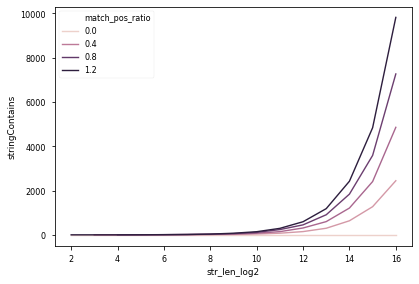

In [111]:
sns.lineplot(data=df, x="str_len_log2", y="stringContains", hue="match_pos_ratio", err_style="bars")

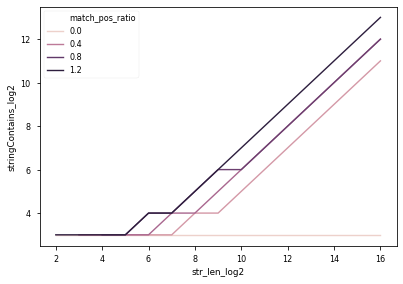

In [119]:
sns.lineplot(data=df, x="str_len_log2", y="stringContains_log2", hue="match_pos_ratio", err_style="bars")

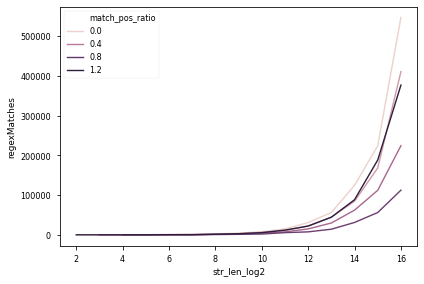

In [112]:
sns.lineplot(data=df, x="str_len_log2", y="regexMatches", hue="match_pos_ratio", err_style="bars")

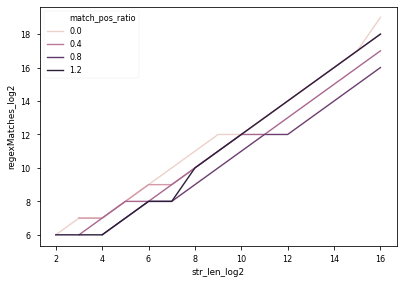

In [117]:
sns.lineplot(data=df, x="str_len_log2", y="regexMatches_log2", hue="match_pos_ratio", err_style="bars")

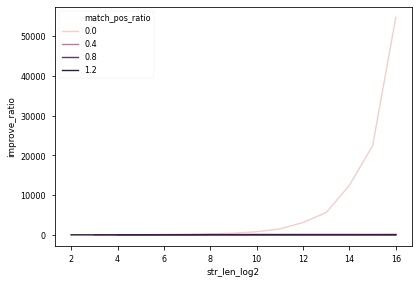

In [123]:
sns.lineplot(data=df, x="str_len_log2", y="improve_ratio", hue="match_pos_ratio", err_style="bars")

In [126]:
df["improve_ratio"].describe()

count       71.000000
mean      1467.480777
std       7114.067293
min          9.666667
25%         18.054487
50%         37.308984
75%        104.787594
max      54706.200000
Name: improve_ratio, dtype: float64

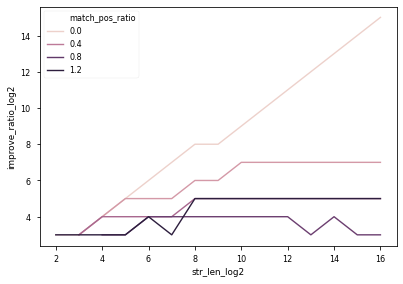

In [124]:
sns.lineplot(data=df, x="str_len_log2", y="improve_ratio_log2", hue="match_pos_ratio", err_style="bars")

In [91]:
df[['str_len', 'match_pos_ratio', 'regexMatches', 'stringContains', 'improve_ratio', 'match_pos']].corr(method="kendall") # kindall

Benchmark,str_len,match_pos_ratio,regexMatches,stringContains,improve_ratio,match_pos
Benchmark,,,,,,
str_len,1.000000,0.011953,0.913855,0.683246,0.387157,0.606230
match_pos_ratio,0.011953,1.000000,-0.076433,0.347245,-0.505533,0.453619
regexMatches,0.913855,-0.076433,1.000000,0.589252,0.478261,0.493172
stringContains,0.683246,0.347245,0.589252,1.000000,0.042993,0.918052
improve_ratio,0.387157,-0.505533,0.478261,0.042993,1.000000,-0.044381
match_pos,0.606230,0.453619,0.493172,0.918052,-0.044381,1.000000


In [131]:
df = df_http0.astype({"str_len":"int", "match_pos_ratio":"float"})
df['match_pos'] = df['str_len'] * df['match_pos_ratio']
df['match_pos'] = df['match_pos'].round().astype(int)
correlation_overall_http = df[['str_len', 'match_pos_ratio', 'regexMatches', 'stringContains', 'improve_ratio', 'match_pos']].corr(method="spearman") # kendall
correlation_overall_http

Benchmark,str_len,match_pos_ratio,regexMatches,stringContains,improve_ratio,match_pos
Benchmark,,,,,,
str_len,1.000000,0.015387,0.983819,0.730602,0.506316,0.639619
match_pos_ratio,0.015387,1.000000,-0.103311,0.433670,-0.650719,0.581949
regexMatches,0.983819,-0.103311,1.000000,0.663077,0.612078,0.552836
stringContains,0.730602,0.433670,0.663077,1.000000,0.036766,0.966782
improve_ratio,0.506316,-0.650719,0.612078,0.036766,1.000000,-0.109855
match_pos,0.639619,0.581949,0.552836,0.966782,-0.109855,1.000000


In [132]:
# correlation, p-value = scipy.stats.pearsonr(x, y)
print(spearmanr(df["str_len"], df["stringContains"])) # correlation=0.7306023912407789, pvalue=4.769354051915669e-13
print(spearmanr(df["str_len"], df["regexMatches"])) # correlation=0.9838187460195338, pvalue=2.9011018852944924e-53
print(spearmanr(df["str_len"], df["improve_ratio"])) # correlation=0.5063159611891035, pvalue=6.642972718513214e-06

print(spearmanr(df["match_pos"], df["stringContains"])) # correlation=0.9667819219774796, pvalue=1.3097741534612772e-42
print(spearmanr(df["match_pos"], df["regexMatches"])) # correlation=0.552836300717351, pvalue=5.758667256703977e-07
print(spearmanr(df["match_pos"], df["improve_ratio"])) # p-value > 0.01 correlation=-0.10985508973711475, pvalue=0.36177431499340296

print(spearmanr(df["match_pos_ratio"], df["stringContains"])) #correlation=0.43367005739959125, pvalue=0.00015807200163607988
print(spearmanr(df["match_pos_ratio"], df["regexMatches"])) # # p-value > 0.01correlation=-0.10331121174759376, pvalue=0.39124515126389225
print(spearmanr(df["match_pos_ratio"], df["improve_ratio"])) # correlation=-0.6507191188902568, pvalue=8.106455211923014e-10

# correlation, p-value = scipy.stats.kendalltau(x, y)


SpearmanrResult(correlation=0.7306023912407789, pvalue=4.769354051915669e-13)
SpearmanrResult(correlation=0.9838187460195338, pvalue=2.9011018852944924e-53)
SpearmanrResult(correlation=0.5063159611891035, pvalue=6.642972718513214e-06)
SpearmanrResult(correlation=0.9667819219774796, pvalue=1.3097741534612772e-42)
SpearmanrResult(correlation=0.552836300717351, pvalue=5.758667256703977e-07)
SpearmanrResult(correlation=-0.10985508973711475, pvalue=0.36177431499340296)
SpearmanrResult(correlation=0.43367005739959125, pvalue=0.00015807200163607988)
SpearmanrResult(correlation=-0.10331121174759376, pvalue=0.39124515126389225)
SpearmanrResult(correlation=-0.6507191188902568, pvalue=8.106455211923014e-10)


In [134]:

formula_string = 'stringContains ~ C(match_pos_ratio)+C(match_pos)+C(str_len)'
string_anova = sm.stats.anova_lm(ols(formula_string,data = df).fit(),typ = 2)
string_anova

,sum_sq,df,F,PR(>F)
C(match_pos_ratio),1.612001e+07,4.0,16423.916022,2.416332e-42
C(match_pos),7.174069e+07,29.0,10081.820715,1.439221e-44
C(str_len),4.728268e+03,14.0,1.376402,2.353661e-01
Residual,6.134351e+03,25.0,NaN,NaN


In [135]:
#remove str_len
formula_string = 'stringContains ~ C(match_pos_ratio)+C(match_pos)'
string_anova = sm.stats.anova_lm(ols(formula_string,data = df).fit(),typ = 2)
string_anova
# formula = 'space ~ C(income)+C(type)'
# house_anova = sm.stats.anova_lm(ols(formula,data = house).fit(),typ = 3)
# #此处typ=3表示做方差分析type iii型检验，
# #type iii即平方和分解法，适用于平衡和非平衡的ANOVA模型，凡是用于type ii和type i的模型均可使用该法。
# #该参数默认使用type i型。
# house_anova

,sum_sq,df,F,PR(>F)
C(match_pos_ratio),1.656188e+07,4.0,14865.504112,1.714026e-61
C(match_pos),1.972564e+08,29.0,24420.989913,6.154097e-75
Residual,1.086262e+04,39.0,NaN,NaN


In [163]:
formula_string = 'stringContains ~ C(match_pos_ratio)+C(str_len)'
string_anova = sm.stats.anova_lm(ols(formula_string,data = df).fit(),typ = 3)
string_anova

,sum_sq,df,F,PR(>F)
Intercept,7.748954e+05,1.0,0.636486,4.286143e-01
C(match_pos_ratio),1.634293e+07,4.0,3.355955,1.616899e-02
C(str_len),1.240446e+08,14.0,7.277731,4.813308e-08
Residual,6.330780e+07,52.0,NaN,NaN


In [162]:
formula_string = 'stringContains ~ C(match_pos)+C(str_len)'
string_anova = sm.stats.anova_lm(ols(formula_string,data = df).fit(),typ = 3)
string_anova

,sum_sq,df,F,PR(>F)
Intercept,1.336590e+02,1.0,0.557536,4.617077e-01
C(match_pos),7.964426e+07,29.0,11455.951888,1.239494e-48
C(str_len),5.074413e+03,14.0,1.511933,1.730046e-01
Residual,6.472754e+03,27.0,NaN,NaN


In [136]:
formula_string = 'stringContains ~ C(match_pos_ratio)+C(match_pos)+C(str_len)'
string_anova = sm.stats.anova_lm(ols(formula_string,data = df).fit(),typ = 3)
string_anova

,sum_sq,df,F,PR(>F)
Intercept,6.436652e+01,1.0,0.262320,6.130260e-01
C(match_pos_ratio),1.612001e+07,4.0,16423.916022,2.416332e-42
C(match_pos),7.174069e+07,29.0,10081.820715,1.439221e-44
C(str_len),4.728268e+03,14.0,1.376402,2.353661e-01
Residual,6.134351e+03,25.0,NaN,NaN


In [141]:
formula_regex = 'regexMatches ~ C(match_pos_ratio)+C(match_pos)+C(str_len)'
regex_anova = sm.stats.anova_lm(ols(formula_regex,data = df).fit(),typ = 3)
regex_anova

,sum_sq,df,F,PR(>F)
Intercept,2.028051e+08,1.0,0.194338,6.631191e-01
C(match_pos_ratio),2.941046e+10,4.0,7.045646,6.085774e-04
C(match_pos),9.936035e+10,29.0,3.283176,1.748682e-03
C(str_len),3.121419e+11,14.0,21.365005,1.778761e-10
Residual,2.608921e+10,25.0,NaN,NaN


In [137]:
formula_string = 'stringContains ~ C(match_pos_ratio)+C(match_pos)'
string_anova = sm.stats.anova_lm(ols(formula_string,data = df).fit(),typ = 3)
string_anova

,sum_sq,df,F,PR(>F)
Intercept,1.500000e+03,1.0,5.385442,2.562587e-02
C(match_pos_ratio),1.656188e+07,4.0,14865.504112,1.714026e-61
C(match_pos),1.972564e+08,29.0,24420.989913,6.154097e-75
Residual,1.086262e+04,39.0,NaN,NaN


In [192]:
formula_regex = 'regexMatches ~ C(match_pos_ratio)+C(str_len) + str_len:match_pos_ratio'
regex_anova = sm.stats.anova_lm(ols(formula_regex,data = df).fit(),typ = 2)
regex_anova

,sum_sq,df,F,PR(>F)
C(match_pos_ratio),1.729815e+10,4.0,3.159261,2.143772e-02
C(str_len),3.204370e+11,14.0,16.720930,2.299113e-14
str_len:match_pos_ratio,3.332887e+10,1.0,24.348175,8.979185e-06
Residual,6.981109e+10,51.0,NaN,NaN


In [195]:
formula_regex = 'regexMatches ~ str_len):match_pos_ratio'
regex_anova = sm.stats.anova_lm(ols(formula_regex,data = df).fit(),typ = 2)
regex_anova

PatsyError: missing '(' or extra ')'
    regexMatches ~ str_len):match_pos_ratio
                          ^

In [196]:
formula_regex = 'regexMatches ~ C(match_pos_ratio)+ C(str_len) + str_len:match_pos_ratio'
regex_anova = sm.stats.anova_lm(ols(formula_regex,data = df).fit(),typ = 2)
regex_anova

,sum_sq,df,F,PR(>F)
C(match_pos_ratio),1.729815e+10,4.0,3.159261,2.143772e-02
C(str_len),3.204370e+11,14.0,16.720930,2.299113e-14
str_len:match_pos_ratio,3.332887e+10,1.0,24.348175,8.979185e-06
Residual,6.981109e+10,51.0,NaN,NaN


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   str_len          71 non-null     int64  
 1   match_pos_ratio  71 non-null     float64
 2   regexMatches     71 non-null     int64  
 3   stringContains   71 non-null     int64  
 4   substr           71 non-null     object 
 5   data_index       71 non-null     object 
 6   improve_ratio    71 non-null     float64
 7   match_pos        71 non-null     int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 4.6+ KB


In [165]:
formula_regex = 'regexMatches ~ C(match_pos_ratio)+C(match_pos)+C(str_len)'
regex_anova = sm.stats.anova_lm(ols(formula_regex,data = df).fit(),typ = 3)
regex_anova

,sum_sq,df,F,PR(>F)
Intercept,2.028051e+08,1.0,0.194338,6.631191e-01
C(match_pos_ratio),2.941046e+10,4.0,7.045646,6.085774e-04
C(match_pos),9.936035e+10,29.0,3.283176,1.748682e-03
C(str_len),3.121419e+11,14.0,21.365005,1.778761e-10
Residual,2.608921e+10,25.0,NaN,NaN


In [166]:
formula_regex = 'regexMatches ~ C(match_pos)+C(str_len)'
regex_anova = sm.stats.anova_lm(ols(formula_regex,data = df).fit(),typ = 3)
regex_anova

,sum_sq,df,F,PR(>F)
Intercept,3.852603e+04,1.0,0.000033,9.954656e-01
C(match_pos),9.654239e+10,29.0,2.842917,3.908817e-03
C(str_len),3.182715e+11,14.0,19.413947,1.546066e-10
Residual,3.161693e+10,27.0,NaN,NaN


In [160]:
formula_improve = 'improve_ratio ~ C(match_pos_ratio)+C(str_len)'
improve_anova = sm.stats.anova_lm(ols(formula_improve,data = df).fit(),typ = 3)
improve_anova

,sum_sq,df,F,PR(>F)
Intercept,2.102746e+07,1.0,0.459327,0.500943
C(match_pos_ratio),5.491503e+08,4.0,2.998930,0.026611
C(str_len),6.194106e+08,14.0,0.966464,0.498777
Residual,2.380501e+09,52.0,NaN,NaN


In [161]:
formula_improve = 'improve_ratio ~ C(match_pos)+C(str_len)'
improve_anova = sm.stats.anova_lm(ols(formula_improve,data = df).fit(),typ = 3)
improve_anova

,sum_sq,df,F,PR(>F)
Intercept,1.028615e+03,1.0,0.000032,0.995507
C(match_pos),2.069716e+09,29.0,2.240839,0.019091
C(str_len),2.139998e+09,14.0,4.799359,0.000241
Residual,8.599353e+08,27.0,NaN,NaN


In [156]:
formula_regex = 'improve_ratio ~ C(match_pos_ratio)+C(match_pos)+C(str_len)'
regex_anova = sm.stats.anova_lm(ols(formula_regex,data = df).fit(),typ = 3)
regex_anova

,sum_sq,df,F,PR(>F)
Intercept,7.148494e+06,1.0,0.265272,0.611045
C(match_pos_ratio),9.496772e+08,4.0,8.810356,0.000140
C(match_pos),2.255915e+09,29.0,2.886704,0.004392
C(str_len),2.326189e+09,14.0,6.165872,0.000044
Residual,6.736938e+08,25.0,NaN,NaN


In [142]:
formula_regex = 'regexMatches ~ C(match_pos_ratio)+C(str_len)'
regex_anova = sm.stats.anova_lm(ols(formula_regex,data = df).fit(),typ = 3)
regex_anova

,sum_sq,df,F,PR(>F)
Intercept,1.730101e+08,1.0,0.087226,7.689094e-01
C(match_pos_ratio),2.501935e+10,4.0,3.153497,2.143857e-02
C(str_len),5.164032e+11,14.0,18.596759,1.809261e-15
Residual,1.031400e+11,52.0,NaN,NaN


In [185]:
formula_string = 'stringContains ~ match_pos_ratio + str_len + str_len:match_pos_ratio'
string_anova_inter = sm.stats.anova_lm(ols(formula_string,data = df2).fit(), typ = 1)
string_anova_inter

,df,sum_sq,mean_sq,F,PR(>F)
match_pos_ratio,1.0,1.841048e+07,1.841048e+07,50037.395146,1.305224e-90
str_len,1.0,1.215250e+08,1.215250e+08,330289.792907,1.353150e-115
str_len:match_pos_ratio,1.0,6.122628e+07,6.122628e+07,166405.441979,1.620571e-106
Residual,61.0,2.244400e+04,3.679344e+02,NaN,NaN


In [6]:
df2 = df.loc[df['str_len'] > 8, :]
df2['str_len'].value_counts()

512      5
64       5
256      5
32       5
128      5
16       5
8192     5
65536    5
4096     5
32768    5
2048     5
16384    5
1024     5
Name: str_len, dtype: int64

In [188]:
df2['match_pos_ratio'].value_counts()

1.00    13
0.75    13
0.50    13
0.25    13
0.00    13
Name: match_pos_ratio, dtype: int64

In [10]:
df2 = pd.melt(df.loc[df['str_len'] > 8, :], id_vars=['str_len', 'match_pos_ratio','match_pos'], value_vars=['regexMatches', 'stringContains'])
df2

,str_len,match_pos_ratio,match_pos,Benchmark,value
0,1024,0.00,0,regexMatches,7862
1,1024,0.25,256,regexMatches,6201
2,1024,0.50,512,regexMatches,4631
3,1024,0.75,768,regexMatches,2070
4,1024,1.00,1024,regexMatches,5563
...,...,...,...,...,...
125,8192,0.00,0,stringContains,10
126,8192,0.25,2048,stringContains,306
127,8192,0.50,4096,stringContains,606
128,8192,0.75,6144,stringContains,915


In [12]:
formula = 'value ~ C(match_pos_ratio) + C(str_len) + C(Benchmark) + str_len:C(Benchmark)' # str_len:match_pos_ratio'
anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 3)
anova

,sum_sq,df,F,PR(>F)
Intercept,1.296511e+09,1.0,1.150598,2.857505e-01
C(match_pos_ratio),1.357969e+10,4.0,3.012850,2.109634e-02
C(str_len),3.900850e+09,12.0,0.288487,9.901262e-01
C(Benchmark),3.158890e+07,1.0,0.028034,8.673340e-01
str_len:C(Benchmark),3.592686e+11,2.0,159.417836,2.328837e-33
Residual,1.250764e+11,111.0,NaN,NaN


In [209]:
formula = 'value ~ C(match_pos_ratio) + C(str_len) + C(Benchmark)' # str_len:match_pos_ratio'
anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 3)
anova

,sum_sq,df,F,PR(>F)
Intercept,1.042632e+10,1.0,3.271643,7.316981e-02
C(match_pos_ratio),1.264505e+10,4.0,0.991963,4.150468e-01
C(str_len),2.568898e+11,12.0,6.717389,5.650959e-09
C(Benchmark),7.144770e+10,1.0,22.419358,6.461104e-06
Residual,3.569300e+11,112.0,NaN,NaN


In [221]:
formula = 'value ~ match_pos_ratio + str_len + C(Benchmark)' 
anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 3)
anova

,sum_sq,df,F,PR(>F)
Intercept,2.861547e+10,1.0,9.848808,2.116651e-03
C(Benchmark),7.144770e+10,1.0,24.590711,2.241450e-06
match_pos_ratio,3.614505e+09,1.0,1.244032,2.668181e-01
str_len,2.567605e+11,1.0,88.371254,3.151089e-16
Residual,3.660899e+11,126.0,NaN,NaN


In [265]:
formula = 'value ~ C(match_pos_ratio) + C(str_len) + C(Benchmark)' 
anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 2)
anova

,sum_sq,df,F,PR(>F)
C(match_pos_ratio),1.264505e+10,4.0,0.991963,4.150468e-01
C(str_len),2.568898e+11,12.0,6.717389,5.650959e-09
C(Benchmark),7.144770e+10,1.0,22.419358,6.461104e-06
Residual,3.569300e+11,112.0,NaN,NaN


In [267]:
formula = 'value ~ C(match_pos) + C(str_len) + C(Benchmark)' 
anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 2)
anova

,sum_sq,df,F,PR(>F)
C(match_pos),4.650837e+10,28.0,0.452443,0.990253
C(str_len),1.539484e+11,12.0,3.494495,0.000306
C(Benchmark),7.144770e+10,1.0,19.461607,0.000029
Residual,3.230667e+11,88.0,NaN,NaN


In [222]:
formula = 'value ~ match_pos_ratio + str_len + C(Benchmark) + str_len:match_pos_ratio + C(Benchmark):str_len + C(Benchmark):match_pos_ratio'
anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 3)
anova

,sum_sq,df,F,PR(>F)
Intercept,8.887170e+08,1.0,1.037897,3.103108e-01
C(Benchmark),2.561821e+09,1.0,2.991847,8.619318e-02
match_pos_ratio,1.504734e+09,1.0,1.757318,1.874162e-01
C(Benchmark):match_pos_ratio,4.380955e+09,1.0,5.116341,2.545703e-02
str_len,3.434573e+11,1.0,401.110021,1.576914e-40
C(Benchmark):str_len,2.412041e+11,1.0,281.692555,1.331187e-33
str_len:match_pos_ratio,1.518396e+10,1.0,17.732741,4.867618e-05
Residual,1.053209e+11,123.0,NaN,NaN


In [217]:
formula = 'value ~ C(match_pos_ratio) + C(str_len) + C(Benchmark) + C(str_len):C(match_pos_ratio) + C(Benchmark):C(str_len) + C(Benchmark):C(match_pos_ratio)'
anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 3)
anova

,sum_sq,df,F,PR(>F)
Intercept,3.771093e+08,1.0,0.344748,5.598530e-01
C(match_pos_ratio),9.606159e+08,4.0,0.219546,9.262528e-01
C(str_len),2.999696e+11,12.0,22.852353,7.827172e-16
C(Benchmark),1.787995e+09,1.0,1.634561,2.072208e-01
C(str_len):C(match_pos_ratio),4.968312e+10,48.0,0.946243,5.755047e-01
C(Benchmark):C(str_len),2.413361e+11,12.0,18.385525,5.206414e-14
C(Benchmark):C(match_pos_ratio),1.340510e+10,4.0,3.063692,2.508765e-02
Residual,5.250568e+10,48.0,NaN,NaN


In [224]:
formula = 'value ~ C(match_pos) + C(str_len) + C(Benchmark) + C(str_len):C(match_pos) + C(Benchmark):C(str_len) + C(Benchmark):C(match_pos)'
# anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 3)
anova = sm.stats.anova_lm(ols(formula,data = df2.loc[df2['str_len'] < 2048, :]).fit(), typ = 3)
anova

/Users/pw/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 96, but rank is 24
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,8.659019e+04,1.0,1.423702,2.558525e-01
C(match_pos),2.424704e+07,16.0,24.916618,8.947194e-07
C(str_len),5.346493e+07,6.0,146.510274,1.631983e-10
C(Benchmark),5.848760e+04,1.0,0.961644,3.461308e-01
C(str_len):C(match_pos),1.030732e+08,96.0,17.653260,4.157490e-06
C(Benchmark):C(str_len),3.341795e+07,6.0,91.575421,2.572234e-09
C(Benchmark):C(match_pos),1.298398e+07,16.0,13.342525,2.814826e-05
Residual,7.298455e+05,12.0,NaN,NaN


In [225]:
formula = 'value ~ C(match_pos) + C(str_len) + C(Benchmark)'
# anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 3)
anova = sm.stats.anova_lm(ols(formula,data = df2.loc[df2['str_len'] < 2048, :]).fit(), typ = 3)
anova

,sum_sq,df,F,PR(>F)
Intercept,3.165595e+06,1.0,2.194890,1.452872e-01
C(match_pos),1.208986e+07,16.0,0.523912,9.205359e-01
C(str_len),3.347392e+07,6.0,3.868234,3.303630e-03
C(Benchmark),4.783369e+07,1.0,33.165862,6.643547e-07
Residual,6.634381e+07,46.0,NaN,NaN


In [254]:
formula = 'value ~ str_len + match_pos_ratio + C(Benchmark)' #'+ C(match_pos):C(str_len)'
# anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 3)
anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 3)
anova

,sum_sq,df,F,PR(>F)
Intercept,2.861547e+10,1.0,9.848808,2.116651e-03
C(Benchmark),7.144770e+10,1.0,24.590711,2.241450e-06
str_len,2.567605e+11,1.0,88.371254,3.151089e-16
match_pos_ratio,3.614505e+09,1.0,1.244032,2.668181e-01
Residual,3.660899e+11,126.0,NaN,NaN


In [252]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
house_anova_post = pairwise_tukeyhsd(df2['value'],df2['str_len'],alpha = 0.05)
house_anova_post.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
16,32,54.8,0.9,-92815.096,92924.696,False
16,64,148.6,0.9,-92721.296,93018.496,False
16,128,335.1,0.9,-92534.796,93204.996,False
16,256,767.0,0.9,-92102.896,93636.896,False
16,512,1491.2,0.9,-91378.696,94361.096,False
16,1024,2582.4,0.9,-90287.496,95452.296,False
16,2048,4967.4,0.9,-87902.496,97837.296,False
16,4096,10028.9,0.9,-82840.996,102898.796,False
16,8192,19114.9,0.9,-73754.996,111984.796,False
16,16384,38236.0,0.9,-54633.896,131105.896,False


In [255]:
house_anova_post = pairwise_tukeyhsd(df2['value'],df2['Benchmark'],alpha = 0.01)
house_anova_post.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
regexMatches,stringContains,-46887.0,0.001,-78974.6316,-14799.3684,True


In [257]:
house_anova_post = pairwise_tukeyhsd(df2['value'],df2['match_pos_ratio'],alpha = 0.01)
house_anova_post.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0.0,0.25,-12372.3077,0.9,-80679.53,55934.9146,False
0.0,0.5,-20500.6154,0.8383,-88807.8377,47806.6069,False
0.0,0.75,-29236.6923,0.5989,-97543.9146,39070.53,False
0.0,1.0,-10210.4615,0.9,-78517.6838,58096.7608,False
0.25,0.5,-8128.3077,0.9,-76435.53,60178.9146,False
0.25,0.75,-16864.3846,0.9,-85171.6069,51442.8377,False
0.25,1.0,2161.8462,0.9,-66145.3761,70469.0684,False
0.5,0.75,-8736.0769,0.9,-77043.2992,59571.1454,False
0.5,1.0,10290.1538,0.9,-58017.0684,78597.3761,False
0.75,1.0,19026.2308,0.8787,-49280.9915,87333.4531,False


In [258]:
house_anova_post = pairwise_tukeyhsd(df2['value'],df2['match_pos'],alpha = 0.01)
house_anova_post.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,4,-38576.0,0.9,-273058.2241,195906.2241,False
0,8,-38527.0,0.9,-210150.4147,133096.4147,False
0,12,-38597.0,0.9,-273079.2241,195885.2241,False
0,16,-38498.1667,0.9,-183223.7374,106227.4041,False
0,24,-38575.0,0.9,-273057.2241,195907.2241,False
0,32,-38356.0,0.9,-183081.5707,106369.5707,False
0,48,-38519.0,0.9,-273001.2241,195963.2241,False
0,64,-38146.5,0.9,-182872.0707,106579.0707,False
0,96,-38432.0,0.9,-272914.2241,196050.2241,False
0,128,-37768.3333,0.9,-182493.9041,106957.2374,False


In [ ]:
house_anova_post = pairwise_tukeyhsd(df2['value'],df2['match_pos'],alpha = 0.01)
house_anova_post.summary()

In [259]:
house_anova_post = pairwise_tukeyhsd(df2['value'],df2['matches'],alpha = 0.01)
house_anova_post.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
False,True,5316.9423,0.7528,-37000.245,47634.1296,False


In [251]:
formula = 'value ~ C(Benchmark) + str_len + match_pos_ratio' #'+ C(match_pos):C(str_len)'
# anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 3)
anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 3)
anova

,sum_sq,df,F,PR(>F)
Intercept,2.861547e+10,1.0,9.848808,2.116651e-03
C(Benchmark),7.144770e+10,1.0,24.590711,2.241450e-06
str_len,2.567605e+11,1.0,88.371254,3.151089e-16
match_pos_ratio,3.614505e+09,1.0,1.244032,2.668181e-01
Residual,3.660899e+11,126.0,NaN,NaN


In [226]:
df2.loc[df2['str_len'] < 2048, :]

,str_len,match_pos_ratio,match_pos,Benchmark,value
0,1024,0.00,0,regexMatches,7479
1,1024,0.25,256,regexMatches,6206
2,1024,0.50,512,regexMatches,4565
3,1024,0.75,768,regexMatches,2452
4,1024,1.00,1024,regexMatches,5591
...,...,...,...,...,...
115,64,0.00,0,stringContains,10
116,64,0.25,16,stringContains,12
117,64,0.50,32,stringContains,14
118,64,0.75,48,stringContains,17


In [245]:
df2["matches"] = df2["match_pos_ratio"] == 1.0

In [246]:
df2["matches"]

0      False
1      False
2      False
3      False
4       True
       ...  
125    False
126    False
127    False
128    False
129     True
Name: matches, Length: 130, dtype: bool

In [260]:
formula = 'value ~ C(Benchmark) + C(str_len) + C(matches)'
# anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 3)
anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 2)
anova

,sum_sq,df,F,PR(>F)
C(Benchmark),7.144770e+10,1.0,22.267678,6.731418e-06
C(str_len),2.568898e+11,12.0,6.671942,5.695231e-09
C(matches),5.880134e+08,1.0,0.183263,6.693849e-01
Residual,3.689871e+11,115.0,NaN,NaN


In [261]:
formula = 'value ~ C(Benchmark) + C(str_len) + C(matches)'
# anova = sm.stats.anova_lm(ols(formula,data = df2).fit(), typ = 3)
anova = sm.stats.anova_lm(ols(formula,data = df2.loc[df2['str_len'] < 2048, :]).fit(), typ = 2)
anova

,sum_sq,df,F,PR(>F)
C(Benchmark),4.783369e+07,1.0,37.242562,7.850334e-08
C(str_len),5.484602e+07,6.0,7.117042,8.887878e-06
C(matches),8.634603e+04,1.0,0.067228,7.962899e-01
Residual,7.834732e+07,61.0,NaN,NaN


In [ ]:
formula_regex = 'regexMatches ~ match_pos_ratio + str_len + str_len:match_pos_ratio'
regex_anova_inter = sm.stats.anova_lm(ols(formula_regex,data = df).fit(), typ = 3)
regex_anova_inter

In [170]:
formula_regex = 'regexMatches ~ match_pos_ratio + str_len + str_len:match_pos_ratio'
regex_anova_inter = sm.stats.anova_lm(ols(formula_regex,data = df).fit(), typ = 3)
regex_anova_inter

,sum_sq,df,F,PR(>F)
Intercept,6.160563e+07,1.0,0.047280,8.285266e-01
match_pos_ratio,7.051037e+07,1.0,0.054114,8.167624e-01
str_len,3.189540e+11,1.0,244.784914,4.650194e-24
str_len:match_pos_ratio,3.405797e+10,1.0,26.138185,2.857891e-06
Residual,8.730079e+10,67.0,NaN,NaN


In [149]:
formula_improve = 'improve_ratio ~ match_pos_ratio + str_len + str_len:match_pos_ratio'
improve_anova_inter = sm.stats.anova_lm(ols(formula_improve,data = df).fit())
improve_anova_inter

,df,sum_sq,mean_sq,F,PR(>F)
match_pos_ratio,1.0,2.722123e+08,2.722123e+08,12.393286,7.801061e-04
str_len,1.0,5.942073e+08,5.942073e+08,27.053079,2.036807e-06
str_len:match_pos_ratio,1.0,1.186172e+09,1.186172e+09,54.004067,3.586584e-10
Residual,67.0,1.471621e+09,2.196450e+07,NaN,NaN


In [147]:
formula_string = 'stringContains ~ match_pos + str_len + str_len:match_pos'
string_anova_inter = sm.stats.anova_lm(ols(formula_string,data = df).fit())
string_anova_inter

,df,sum_sq,mean_sq,F,PR(>F)
match_pos,1.0,2.042451e+08,2.042451e+08,1.256033e+06,6.974178e-145
str_len,1.0,8.057724e+02,8.057724e+02,4.955206e+00,2.938016e-02
str_len:match_pos,1.0,1.158265e+04,1.158265e+04,7.122908e+01,3.880988e-12
Residual,67.0,1.089496e+04,1.626113e+02,NaN,NaN


In [148]:
formula_regex = 'regexMatches ~ match_pos + str_len + str_len:match_pos'
regex_anova_inter = sm.stats.anova_lm(ols(formula_regex,data = df).fit())
regex_anova_inter

,df,sum_sq,mean_sq,F,PR(>F)
match_pos,1.0,1.871666e+11,1.871666e+11,143.667166,2.514921e-18
str_len,1.0,3.641312e+11,3.641312e+11,279.503341,1.335836e-25
str_len:match_pos,1.0,8.508518e+07,8.508518e+07,0.065311,7.990742e-01
Residual,67.0,8.728621e+10,1.302779e+09,NaN,NaN


In [150]:
formula_improve = 'improve_ratio ~ match_pos + str_len + str_len:match_pos'
improve_anova_inter = sm.stats.anova_lm(ols(formula_improve,data = df).fit())
improve_anova_inter

,df,sum_sq,mean_sq,F,PR(>F)
match_pos,1.0,2.314579e+07,2.314579e+07,1.053431,3.084097e-01
str_len,1.0,2.028913e+09,2.028913e+09,92.341586,3.138859e-14
str_len:match_pos,1.0,4.181428e+04,4.181428e+04,0.001903,9.653336e-01
Residual,67.0,1.472112e+09,2.197183e+07,NaN,NaN


In [152]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
string_anova_post1 = pairwise_tukeyhsd(df['stringContains'],df['match_pos'],alpha = 0.05)
string_anova_post1.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,2,0.0,0.9,-69.7355,69.7355,False
0,4,-0.3333,0.9,-43.0375,42.3708,False
0,8,-0.3333,0.9,-43.0375,42.3708,False
0,12,0.0,0.9,-69.7355,69.7355,False
0,16,1.0,0.9,-41.7041,43.7041,False
0,24,2.0,0.9,-67.7355,71.7355,False
0,32,3.3333,0.9,-39.3708,46.0375,False
0,48,7.0,0.9,-62.7355,76.7355,False
0,64,8.0,0.9,-34.7041,50.7041,False
0,96,13.0,0.9,-56.7355,82.7355,False


In [153]:
string_anova_post2 = pairwise_tukeyhsd(df['stringContains'],df['match_pos_ratio'],alpha = 0.05)
string_anova_post2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0.0,0.25,343.9286,0.9,-1412.0481,2099.9052,False
0.0,0.5,693.2143,0.7773,-1062.7624,2449.191,False
0.0,0.75,1122.3846,0.408,-668.1845,2912.9538,False
0.0,1.0,1304.7333,0.2238,-420.7023,3030.169,False
0.25,0.5,349.2857,0.9,-1436.7098,2135.2813,False
0.25,0.75,778.456,0.7257,-1041.5615,2598.4736,False
0.25,1.0,960.8048,0.5386,-795.1719,2716.7814,False
0.5,0.75,429.1703,0.9,-1390.8472,2249.1879,False
0.5,1.0,611.519,0.8502,-1144.4576,2367.4957,False
0.75,1.0,182.3487,0.9,-1608.2204,1972.9179,False


In [154]:
string_anova_est = ols('stringContains ~ C(str_len)+C(match_pos)-1',data = df).fit()
string_anova_est.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                  OLS                 Adj. R-squared:        1.000    
Dependent Variable:     stringContains      AIC:                   609.8893 
Date:                   2021-03-16 01:35    BIC:                   709.4473 
No. Observations:       71                  Log-Likelihood:        -260.94  
Df Model:               43                  F-statistic:           1.981e+04
Df Residuals:           27                  Prob (F-statistic):    2.11e-52 
R-squared:              1.000               Scale:                 239.73   
----------------------------------------------------------------------------
                        Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
----------------------------------------------------------------------------
C(str_len)[4]            9.3178  12.4789   0.7467 0.4617  -16.2868   34.9224
C(str_len)[8]            9.4258  11.0244   0.8550 0.4001  -13.1945   32.0460
C(str_len)[16]           9.1632  10.0410   0.9126 0.3695  -11.4392   29.7657
C(str_len)[32]           9.3361   9.9558   0.9378 0.3567  -11.0915   29.7637
C(str_len)[64]           9.6276   9.9170   0.9708 0.3403  -10.7204   29.9757
C(str_len)[128]         10.0171   9.9092   1.0109 0.3210  -10.3148   30.3491
C(str_len)[256]          9.7789   9.9069   0.9871 0.3324  -10.5483   30.1061
C(str_len)[512]         10.0050   9.9064   1.0100 0.3215  -10.3213   30.3313
C(str_len)[1024]        11.3384   9.9067   1.1445 0.2625   -8.9886   31.6653
C(str_len)[2048]         9.7935   9.9085   0.9884 0.3317  -10.5371   30.1241
C(str_len)[4096]        18.6694   9.9153   1.8829 0.0705   -1.6751   39.0138
C(str_len)[8192]        12.1212   9.9425   1.2191 0.2333   -8.2790   32.5215
C(str_len)[16384]       34.8564  10.0342   3.4738 0.0017   14.2679   55.4449
C(str_len)[32768]       11.2462  10.4841   1.0727 0.2929  -10.2654   32.7577
C(str_len)[65536]      -24.6966  11.5569  -2.1370 0.0418  -48.4095   -0.9838
C(match_pos)[T.2]        0.5742  19.0071   0.0302 0.9761  -38.4251   39.5736
C(match_pos)[T.4]        0.3644  11.9762   0.0304 0.9760  -24.2088   24.9376
C(match_pos)[T.8]        0.3583  11.6913   0.0306 0.9758  -23.6302   24.3469
C(match_pos)[T.12]       0.8368  18.4541   0.0453 0.9642  -37.0279   38.7015
C(match_pos)[T.16]       1.6244  11.4841   0.1414 0.8886  -21.9390   25.1877
C(match_pos)[T.24]       2.6639  18.4079   0.1447 0.8860  -35.1059   40.4338
C(match_pos)[T.32]       3.6731  11.4526   0.3207 0.7509  -19.8258   27.1719
C(match_pos)[T.48]       7.3724  18.3869   0.4010 0.6916  -30.3545   45.0992
C(match_pos)[T.64]       8.1921  11.4419   0.7160 0.4802  -15.2848   31.6690
C(match_pos)[T.96]      12.9829  18.3827   0.7063 0.4861  -24.7353   50.7010
C(match_pos)[T.128]     17.0663  11.4395   1.4919 0.1473   -6.4056   40.5382
C(match_pos)[T.192]     28.2211  18.3815   1.5353 0.1363   -9.4945   65.9367
C(match_pos)[T.256]     34.6259  11.4389   3.0270 0.0054   11.1551   58.0967
C(match_pos)[T.384]     52.9950  18.3812   2.8831 0.0076   15.2799   90.7101
C(match_pos)[T.512]     70.2877  11.4393   6.1444 0.0000   46.8162   93.7592
C(match_pos)[T.768]    107.6616  18.3814   5.8571 0.0000   69.9462  145.3771
C(match_pos)[T.1024]   139.7329  11.4413  12.2130 0.0000  116.2572  163.2086
C(match_pos)[T.1536]   217.2065  18.3823  11.8160 0.0000  179.4890  254.9239
C(match_pos)[T.2048]   293.8053  11.4494  25.6612 0.0000  270.3130  317.2975
C(match_pos)[T.3072]   445.3306  18.3860  24.2212 0.0000  407.6057  483.0555
C(match_pos)[T.4096]   585.7843  11.4785  51.0332 0.0000  562.2324  609.3363
C(match_pos)[T.6144]   906.8788  18.4007  49.2851 0.0000  869.1237  944.6338
C(match_pos)[T.8192]  1220.9254  11.6033 105.2219 0.0000 1197.1173 1244.7335
C(match_pos)[T.12288] 1817.1436  18.4504  98.4881 0.0000 1779.2865 1855.0007
C(match_pos)[T.16384] 2445.8647  11.9722 204.29

In [133]:
print(spearmanr(df1["str_len"], df1["stringContains"])) 
print(spearmanr(df1["str_len"], df1["regexMatches"]))
print(spearmanr(df1["str_len"], df1["improve_ratio"])) 
print(spearmanr(df1["match_pos"], df1["stringContains"])) 
print(spearmanr(df1["match_pos"], df1["regexMatches"])) 
print(spearmanr(df1["match_pos"], df1["improve_ratio"])) # p-value > 0.01   correlation=-0.22832324120510575, pvalue=0.09054777695946432

print(spearmanr(df1["match_pos_ratio"], df1["stringContains"])) 
print(spearmanr(df1["match_pos_ratio"], df1["regexMatches"])) # # p-value > 0.01 correlation=-0.08994582859447857, pvalue=0.5097352465439584
print(spearmanr(df1["match_pos_ratio"], df1["improve_ratio"])) 

SpearmanrResult(correlation=0.6496022980534923, pvalue=6.073207092535084e-08)
SpearmanrResult(correlation=0.9832862535517075, pvalue=1.2393270048668327e-41)
SpearmanrResult(correlation=0.4538428696501158, pvalue=0.0004429040292954865)
SpearmanrResult(correlation=0.9826110797692039, pvalue=3.5797147156800117e-41)
SpearmanrResult(correlation=0.46299742366217517, pvalue=0.0003267150814319974)
SpearmanrResult(correlation=-0.22832324120510575, pvalue=0.09054777695946432)
SpearmanrResult(correlation=0.6158952345200545, pvalue=4.3613660228852e-07)
SpearmanrResult(correlation=-0.08994582859447857, pvalue=0.5097352465439584)
SpearmanrResult(correlation=-0.6578965492603207, pvalue=3.599408912320158e-08)


In [95]:
df1 = df.loc[df['match_pos_ratio'] < 1, :]
df2 = df.loc[df['match_pos_ratio'] == 1, :]
print(df1.shape, df2.shape)
print(df1.head(), df2.head())

(56, 8) (15, 8)
Benchmark  str_len  match_pos_ratio  regexMatches  stringContains substr  \
0             1024             0.00          7862              10   http   
1             1024             0.25          6201              46   http   
2             1024             0.50          4631              81   http   
3             1024             0.75          2070             117   http   
5              128             0.00          1442              10   http   

Benchmark data_index  improve_ratio  match_pos  
0            http2/2     786.200000          0  
1            http2/2     134.804348        256  
2            http2/2      57.172840        512  
3            http2/2      17.692308        768  
5            http2/2     144.200000          0   Benchmark  str_len  match_pos_ratio  regexMatches  stringContains substr  \
4             1024              1.0          5563             150   http   
9              128              1.0           293              25   http   
14   

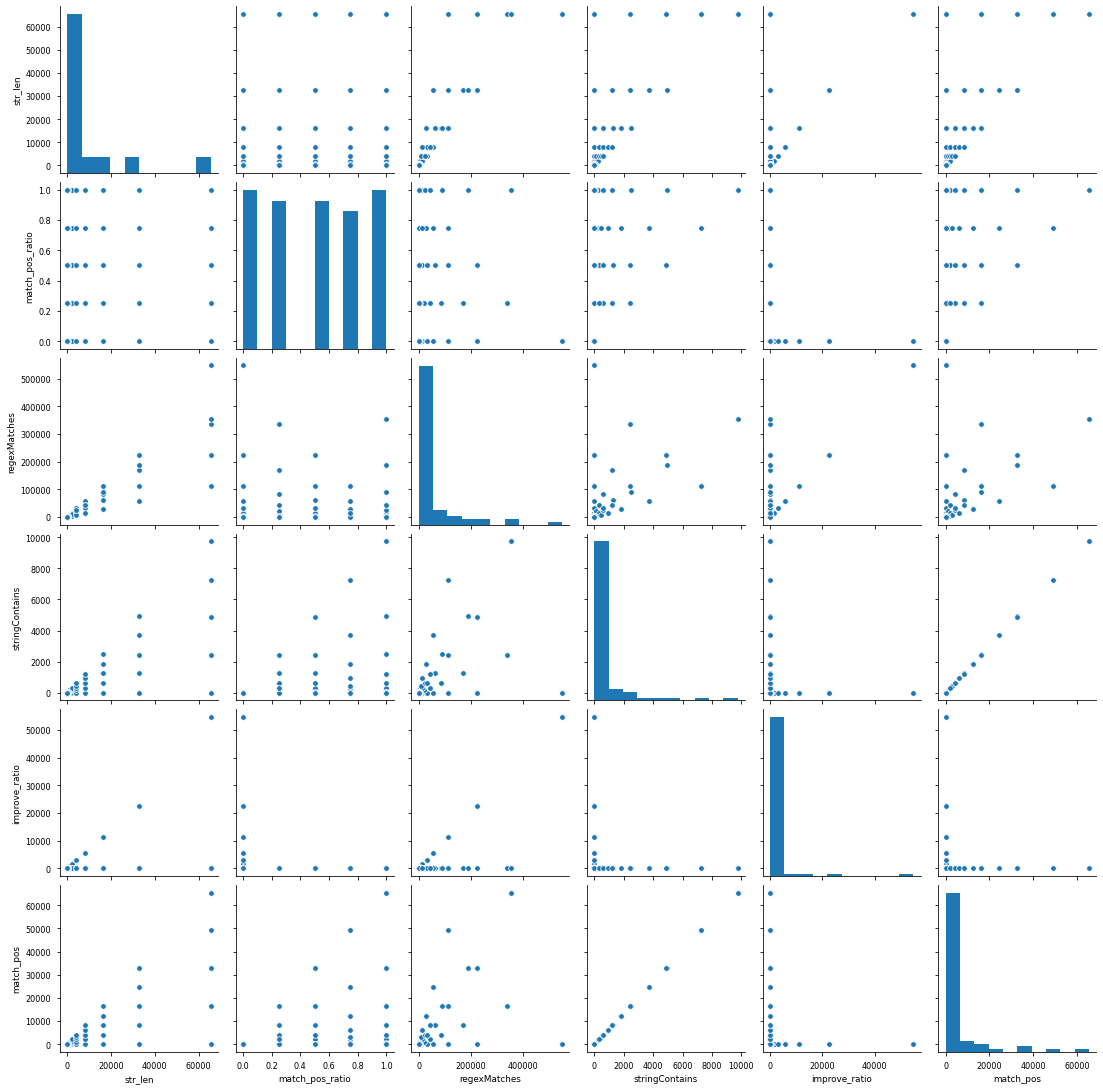

In [79]:
sns.pairplot(df)

/Users/pw/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


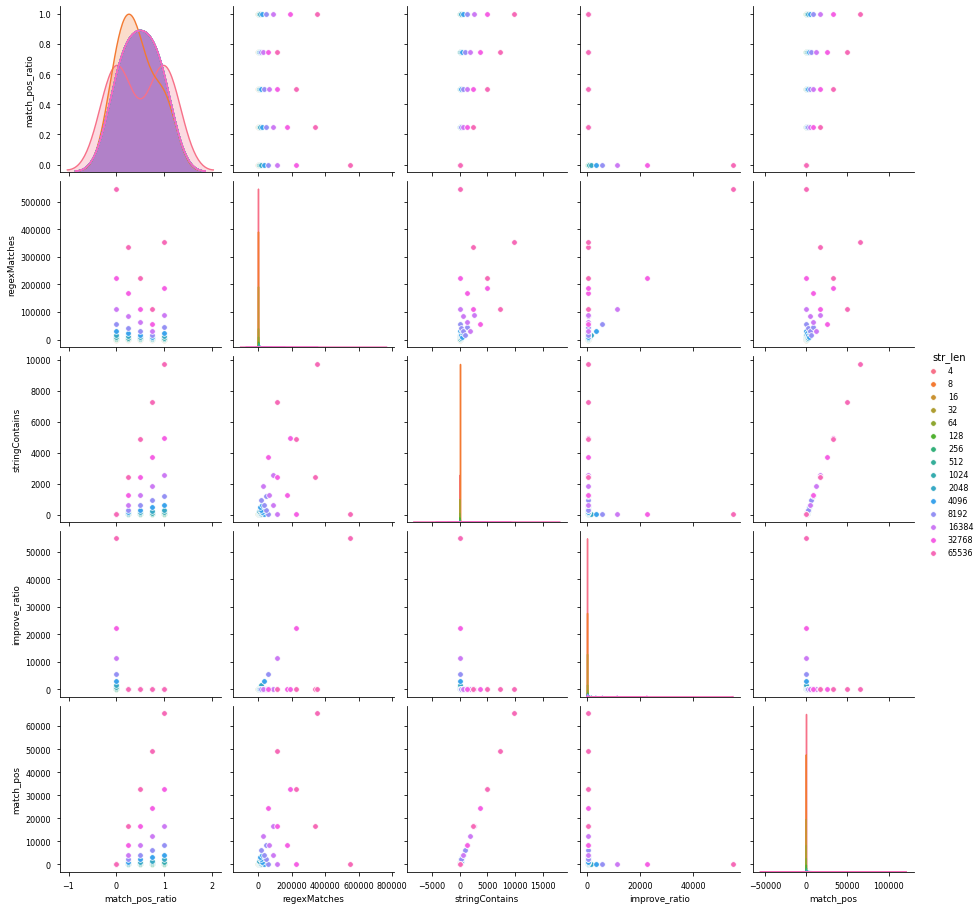

In [80]:
sns.pairplot(df , hue ='str_len')

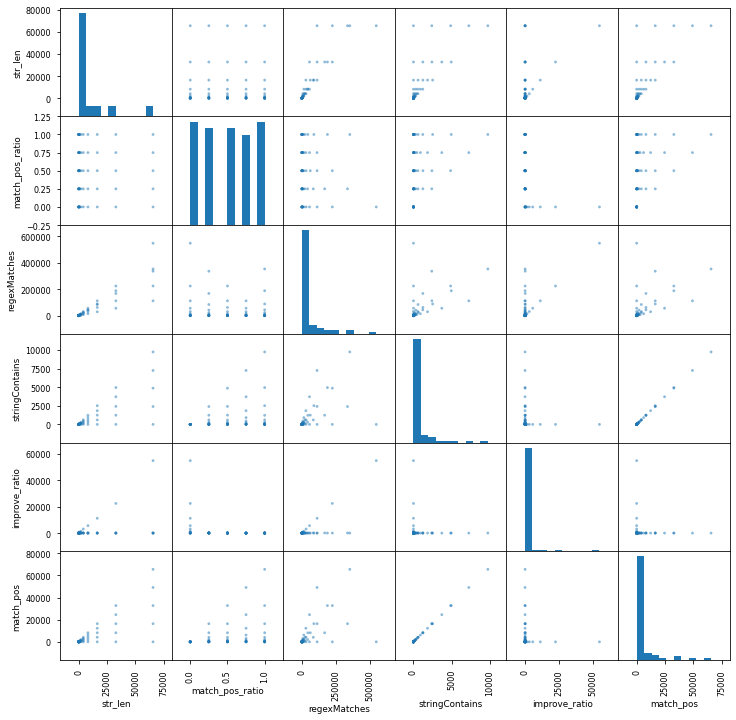

In [81]:
pd.plotting.scatter_matrix(df, figsize=(12,12),range_padding=0.5); 

In [46]:
df = df_http2.astype({"str_len":"int", "match_pos_ratio":"float"})
df['match_pos'] = df['str_len'] * df['match_pos_ratio']
df['match_pos'] = df['match_pos'].round().astype(int)
correlation_overall_http = df[['str_len', 'match_pos_ratio', 'regexMatches', 'stringContains', 'improve_ratio', 'match_pos']].corr(method="spearman") # kendall
correlation_overall_http

Benchmark,str_len,match_pos_ratio,regexMatches,stringContains,improve_ratio,match_pos
Benchmark,,,,,,
str_len,1.000000,0.015387,0.984163,0.731794,0.520899,0.639619
match_pos_ratio,0.015387,1.000000,-0.102378,0.428632,-0.612491,0.581949
regexMatches,0.984163,-0.102378,1.000000,0.662126,0.629739,0.551404
stringContains,0.731794,0.428632,0.662126,1.000000,0.057578,0.966782
improve_ratio,0.520899,-0.612491,0.629739,0.057578,1.000000,-0.087743
match_pos,0.639619,0.581949,0.551404,0.966782,-0.087743,1.000000


In [47]:
df = df_digit0.astype({"str_len":"int", "match_pos_ratio":"float"})
df['match_pos'] = df['str_len'] * df['match_pos_ratio']
df['match_pos'] = df['match_pos'].round().astype(int)
correlation_overall_digit = df[['str_len', 'match_pos_ratio', 'regexMatches', 'stringContains', 'improve_ratio', 'match_pos']].corr(method="spearman") # kendall
correlation_overall_digit

Benchmark,str_len,match_pos_ratio,regexMatches,stringContains,improve_ratio,match_pos
Benchmark,,,,,,
str_len,1.000000,-0.149420,0.966213,0.740921,0.048327,0.625830
match_pos_ratio,-0.149420,1.000000,-0.300981,0.252890,-0.896671,0.475833
regexMatches,0.966213,-0.300981,1.000000,0.647671,0.217027,0.508142
stringContains,0.740921,0.252890,0.647671,1.000000,-0.326755,0.958313
improve_ratio,0.048327,-0.896671,0.217027,-0.326755,1.000000,-0.552686
match_pos,0.625830,0.475833,0.508142,0.958313,-0.552686,1.000000


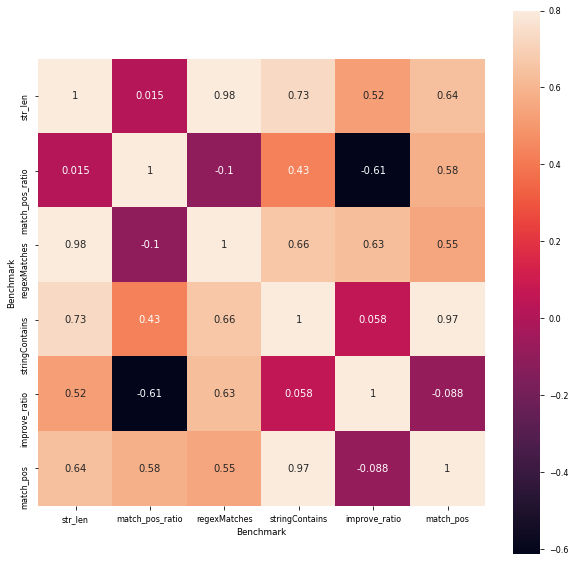

In [40]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(correlation_overall, vmax=0.8, square=True, annot=True)

In [41]:
correlation_matches = df1[['str_len', 'match_pos_ratio', 'regexMatches', 'stringContains', 'improve_ratio', 'match_pos']].corr(method="spearman") # kendall
correlation_matches

Benchmark,str_len,match_pos_ratio,regexMatches,stringContains,improve_ratio,match_pos
Benchmark,,,,,,
str_len,1.000000,0.078795,0.983286,0.649602,0.453843,0.574749
match_pos_ratio,0.078795,1.000000,-0.089946,0.615895,-0.657897,0.688927
regexMatches,0.983286,-0.089946,1.000000,0.546731,0.584826,0.462997
stringContains,0.649602,0.615895,0.546731,1.000000,-0.140396,0.982611
improve_ratio,0.453843,-0.657897,0.584826,-0.140396,1.000000,-0.228323
match_pos,0.574749,0.688927,0.462997,0.982611,-0.228323,1.000000


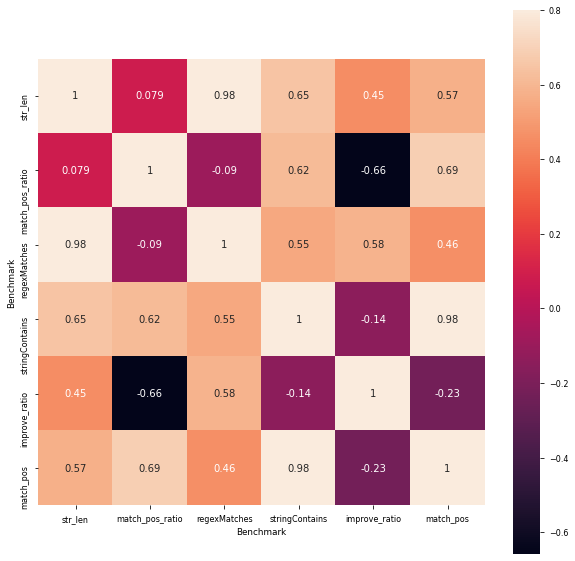

In [42]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(correlation_matches, vmax=0.8, square=True, annot=True)

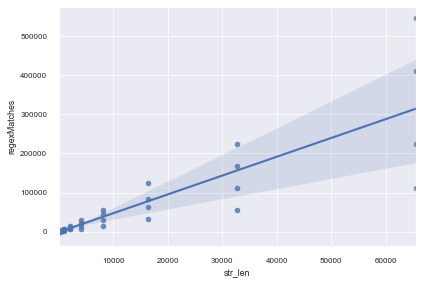

In [187]:
sns.regplot(x="str_len", y="regexMatches", data = df1)

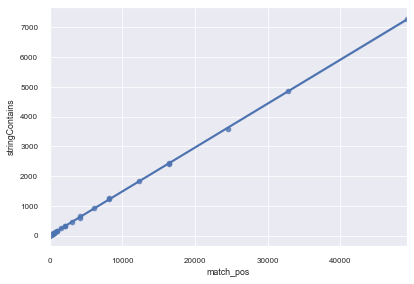

In [188]:
sns.regplot(x="match_pos", y="stringContains", data = df1)

In [178]:
df2[['str_len', 'match_pos_ratio', 'regexMatches', 'stringContains', 'improve_ratio', 'match_pos']].corr(method="spearman") # kendall

Benchmark,str_len,match_pos_ratio,regexMatches,stringContains,improve_ratio,match_pos
Benchmark,,,,,,
str_len,1.000000,NaN,0.995532,0.996422,0.895443,1.000000
match_pos_ratio,NaN,NaN,NaN,NaN,NaN,NaN
regexMatches,0.995532,NaN,1.000000,0.993726,0.903399,0.995532
stringContains,0.996422,NaN,0.993726,1.000000,0.893277,0.996422
improve_ratio,0.895443,NaN,0.903399,0.893277,1.000000,0.895443
match_pos,1.000000,NaN,0.995532,0.996422,0.895443,1.000000


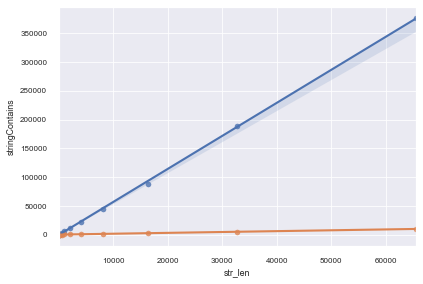

In [185]:
sns.regplot(x="str_len", y="regexMatches", data = df2)

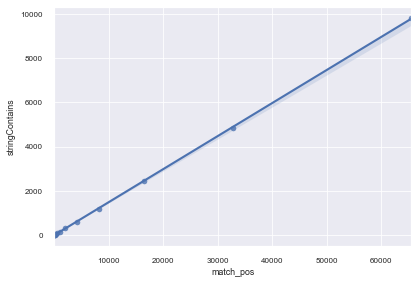

In [189]:
sns.regplot(x="match_pos", y="stringContains", data = df2)

In [179]:
dfd = df_digit1.astype({"str_len":"int", "match_pos_ratio":"float"})
dfd['match_pos'] = dfd['str_len'] * dfd['match_pos_ratio']
dfd['match_pos'] = dfd['match_pos'].round().astype(int)
dfd.head()

Benchmark,str_len,match_pos_ratio,regexMatches,stringContains,substr,data_index,improve_ratio,match_pos
0,1024,0.00,12294,18,8888888888888888888888888888888888888888888888...,8multiply1/1,683.000000,0
1,1024,0.25,10537,52,8888888888888888888888888888888888888888888888...,8multiply1/1,202.634615,256
2,1024,0.50,7309,89,8888888888888888888888888888888888888888888888...,8multiply1/1,82.123596,512
3,1024,0.75,6674,128,8888888888888888888888888888888888888888888888...,8multiply1/1,52.140625,768
4,1024,1.00,5636,142,8888888888888888888888888888888888888888888888...,8multiply1/1,39.690141,1024


In [181]:
dfd1 = dfd.loc[dfd['match_pos_ratio'] < 1, :]
dfd2 = dfd.loc[dfd['match_pos_ratio'] == 1, :]
dfd[['str_len', 'match_pos_ratio', 'regexMatches', 'stringContains', 'improve_ratio', 'match_pos']].corr(method="spearman") # kendall

Benchmark,str_len,match_pos_ratio,regexMatches,stringContains,improve_ratio,match_pos
Benchmark,,,,,,
str_len,1.000000,-0.149420,0.958177,0.728907,-0.044417,0.625830
match_pos_ratio,-0.149420,1.000000,-0.325448,0.260442,-0.889290,0.475833
regexMatches,0.958177,-0.325448,1.000000,0.622766,0.148341,0.492557
stringContains,0.728907,0.260442,0.622766,1.000000,-0.442396,0.957853
improve_ratio,-0.044417,-0.889290,0.148341,-0.442396,1.000000,-0.628618
match_pos,0.625830,0.475833,0.492557,0.957853,-0.628618,1.000000


In [182]:
dfd1[['str_len', 'match_pos_ratio', 'regexMatches', 'stringContains', 'improve_ratio', 'match_pos']].corr(method="spearman") # kendall

Benchmark,str_len,match_pos_ratio,regexMatches,stringContains,improve_ratio,match_pos
Benchmark,,,,,,
str_len,1.000000,0.108137,0.947809,0.555796,-0.292286,0.574713
match_pos_ratio,0.108137,1.000000,-0.129075,0.725078,-0.913023,0.725305
regexMatches,0.947809,-0.129075,1.000000,0.398424,-0.057036,0.417359
stringContains,0.555796,0.725078,0.398424,1.000000,-0.890734,0.996994
improve_ratio,-0.292286,-0.913023,-0.057036,-0.890734,1.000000,-0.886686
match_pos,0.574713,0.725305,0.417359,0.996994,-0.886686,1.000000


In [183]:
dfd2[['str_len', 'match_pos_ratio', 'regexMatches', 'stringContains', 'improve_ratio', 'match_pos']].corr(method="spearman") # kendall

Benchmark,str_len,match_pos_ratio,regexMatches,stringContains,improve_ratio,match_pos
Benchmark,,,,,,
str_len,1.000000,NaN,1.000000,0.991031,0.003571,1.000000
match_pos_ratio,NaN,NaN,NaN,NaN,NaN,NaN
regexMatches,1.000000,NaN,1.000000,0.991031,0.003571,1.000000
stringContains,0.991031,NaN,0.991031,1.000000,-0.068471,0.991031
improve_ratio,0.003571,NaN,0.003571,-0.068471,1.000000,0.003571
match_pos,1.000000,NaN,1.000000,0.991031,0.003571,1.000000


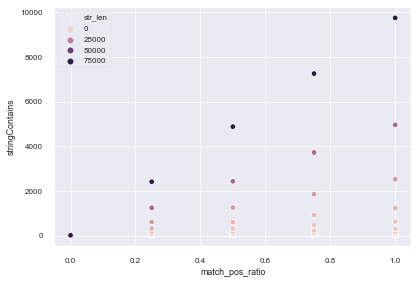

In [46]:
sns.scatterplot(data=df_http0, x="match_pos_ratio", y="stringContains", hue="str_len") #err_style="bars")
plt.legend(loc="best")

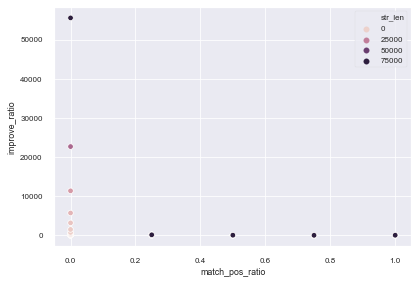

In [49]:
sns.scatterplot(data=df_http0, x="match_pos_ratio", y="improve_ratio", hue="str_len") #err_style="bars")
plt.legend(loc="best")

4 (2, 8)
8 (4, 8)
16 (5, 8)


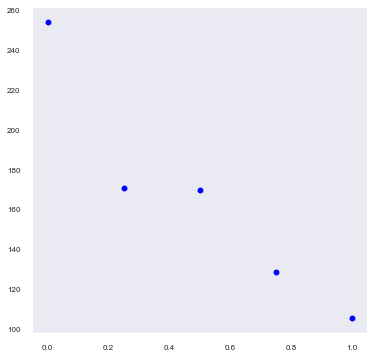

32 (5, 8)


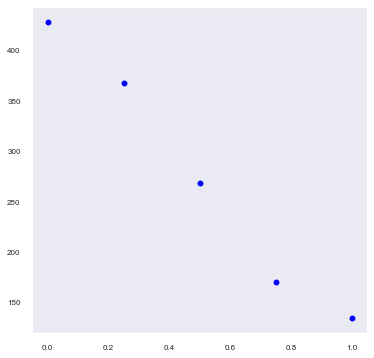

64 (5, 8)


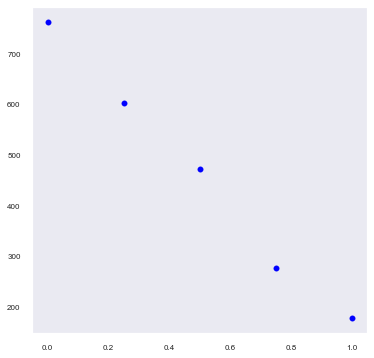

128 (5, 8)


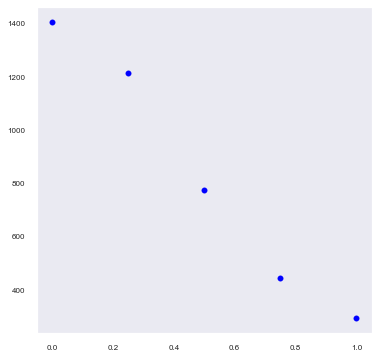

256 (5, 8)


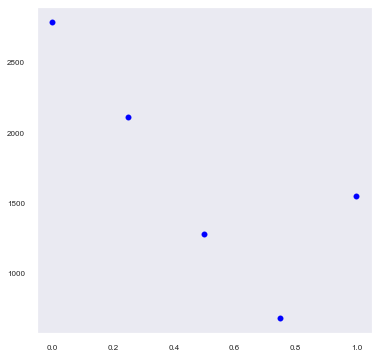

512 (5, 8)


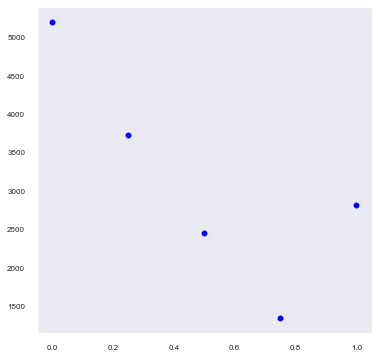

1024 (5, 8)


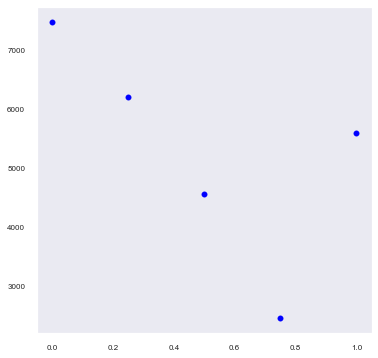

2048 (5, 8)


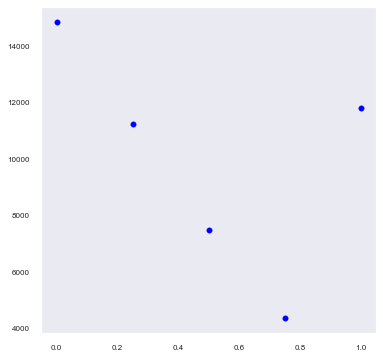

4096 (5, 8)


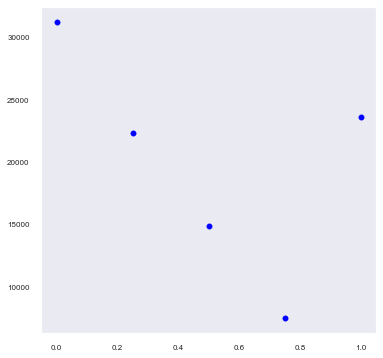

8192 (5, 8)


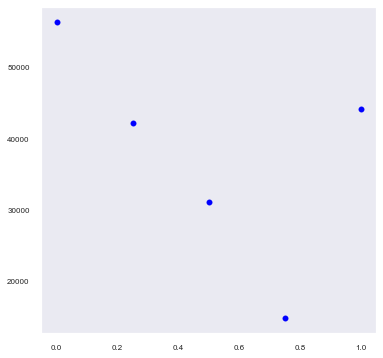

16384 (5, 8)


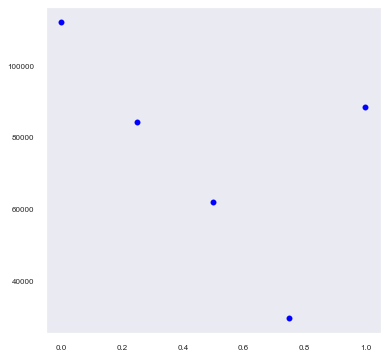

32768 (5, 8)


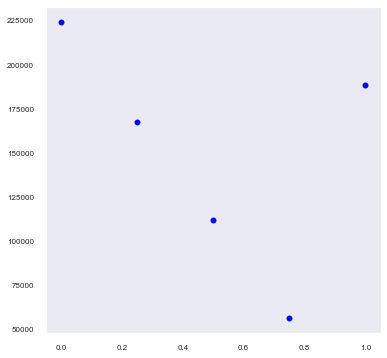

65536 (5, 8)


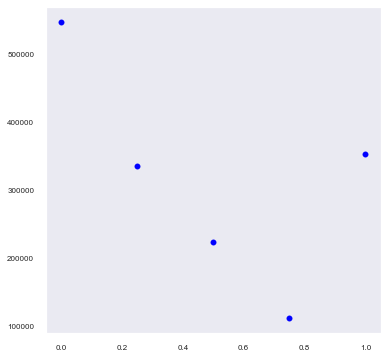

In [47]:
plot_cor(df_http0, "str_len", "match_pos_ratio", "regexMatches")

4 (2, 8)
8 (4, 8)
16 (5, 8)


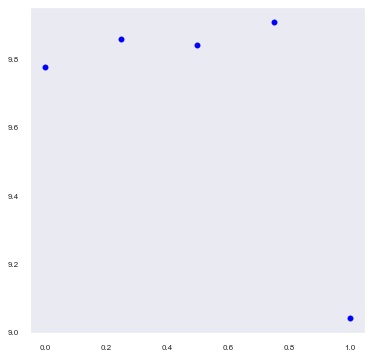

32 (5, 8)


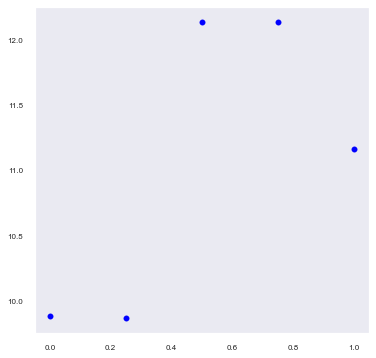

64 (5, 8)


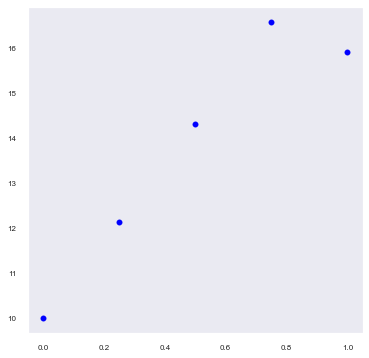

128 (5, 8)


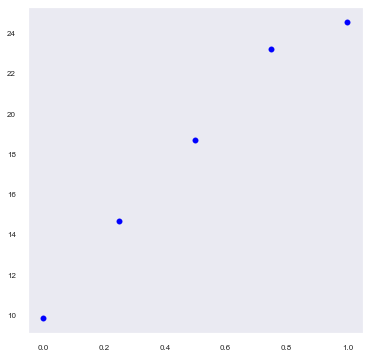

256 (5, 8)


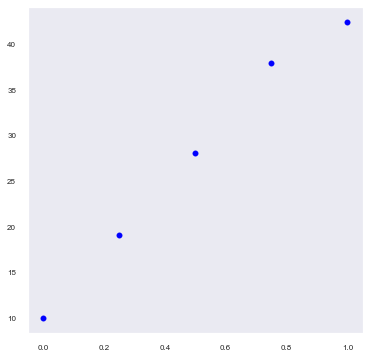

512 (5, 8)


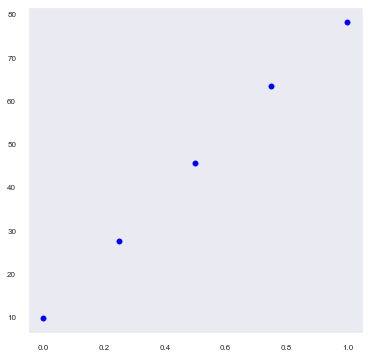

1024 (5, 8)


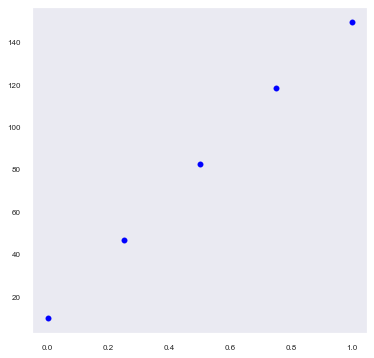

2048 (5, 8)


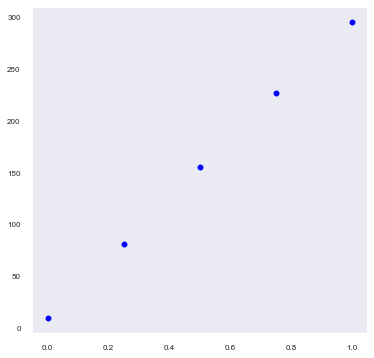

4096 (5, 8)


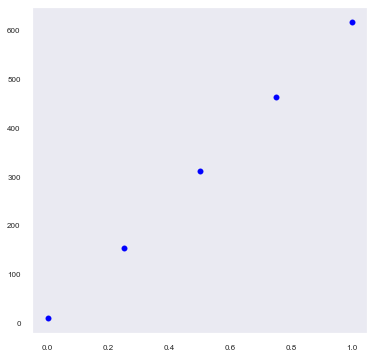

8192 (5, 8)


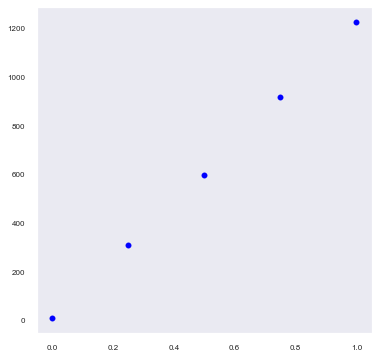

16384 (5, 8)


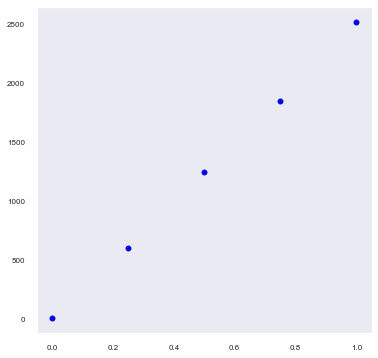

32768 (5, 8)


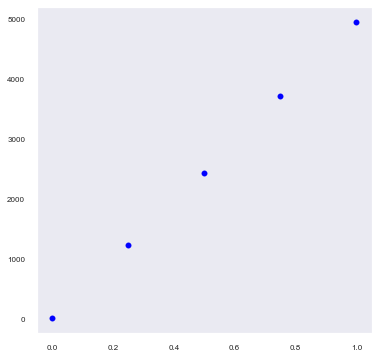

65536 (5, 8)


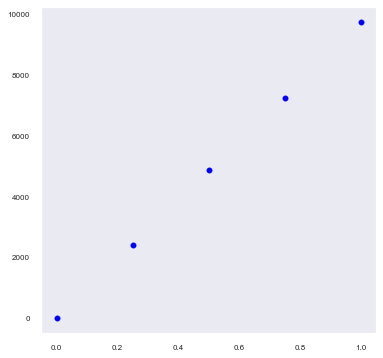

In [48]:
plot_cor(df_http0, "str_len", "match_pos_ratio", "stringContains")

4 (2, 8)
8 (4, 8)
16 (5, 8)


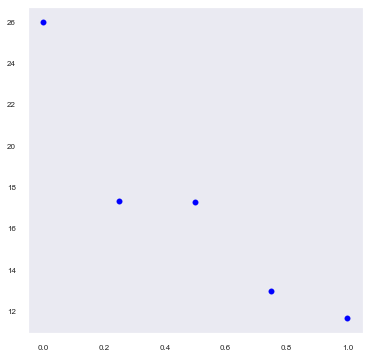

32 (5, 8)


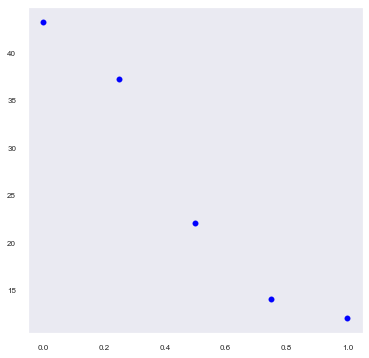

64 (5, 8)


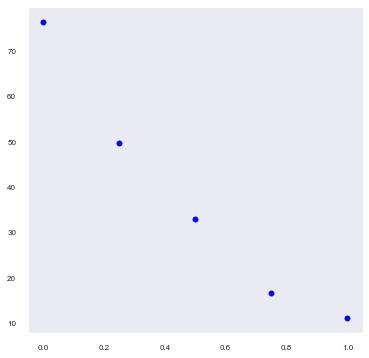

128 (5, 8)


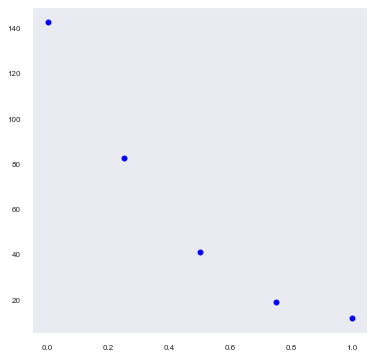

256 (5, 8)


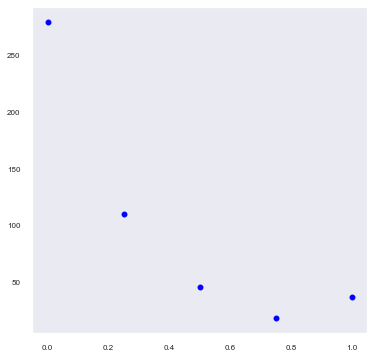

512 (5, 8)


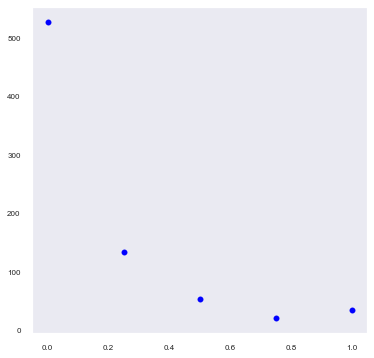

1024 (5, 8)


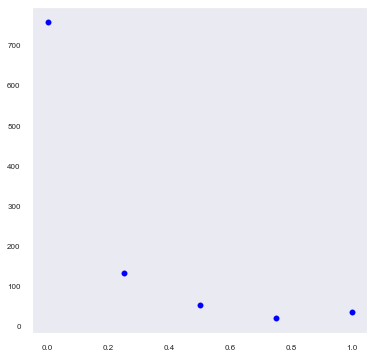

2048 (5, 8)


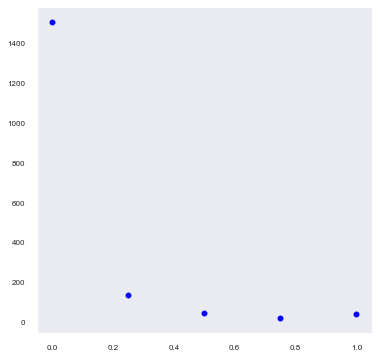

4096 (5, 8)


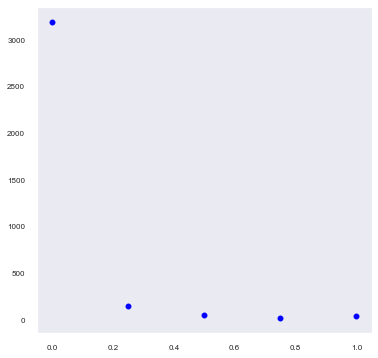

8192 (5, 8)


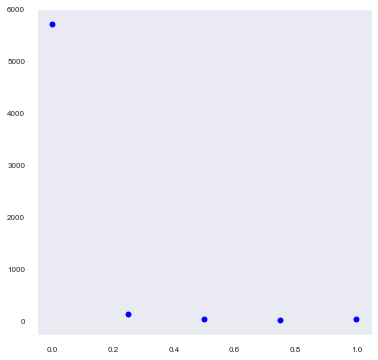

16384 (5, 8)


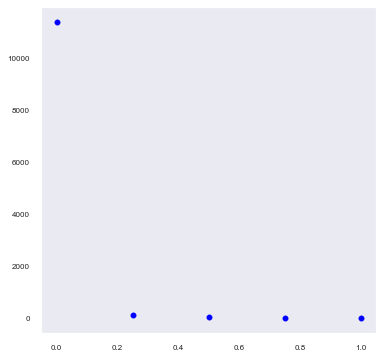

32768 (5, 8)


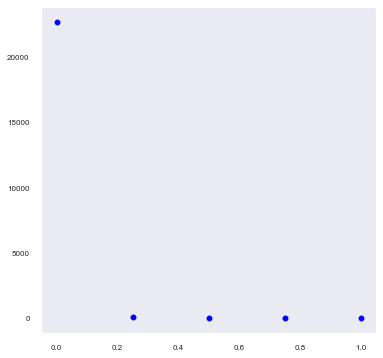

65536 (5, 8)


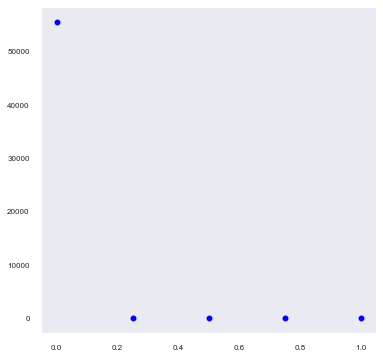

In [50]:
plot_cor(df_http0, "str_len", "match_pos_ratio", "improve_ratio")

In [ ]:
s0.hist(cumulative=True, density=1, bins=10)
s1.hist(cumulative=True, density=1, bins=10)
plt.xticks(rotation = 90)

In [ ]:
plt.hist([s0, s1], 10, label=['y1', 'y1\''])
plt.legend(loc='upper right')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
hist, bin_edges = np.histogram(s0.to_numpy(dtype=float))
np.cumsum(hist)

In [ ]:
hist, bin_edges = np.histogram(s1.to_numpy(dtype=float))
np.cumsum(hist)

In [ ]:
H,X1 = np.histogram(s0.to_numpy(dtype=float), bins = 10)
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
#method 2
N = 50
X2 = np.sort(s1.to_numpy(dtype=float))
F2 = np.array(range(N))/float(N)

plt.plot(X1[1:], F1, color = "red")
plt.plot(X2, F2, color = "blue")
plt.show()

In [ ]:
s0.describe(percentiles = [0.25, 0.5, 0.75, 0.9], include = "all")

In [ ]:
pd.DataFrame({'0': df0["regexMatches"], '1': df1["regexMatches"], '2': df2["regexMatches"], '3': df3["regexMatches"]})

In [ ]:
pd.DataFrame({'0': df0["stringContains"], '1': df1["stringContains"], '2': df2["stringContains"], '3': df3["stringContains"]})

In [ ]:
N = 71
X1 = np.sort(df0["regexMatches"].to_numpy(dtype=float))
F1 = np.array(range(N))/float(N)

X2 = np.sort(df1["regexMatches"].to_numpy(dtype=float))
F2 = np.array(range(N))/float(N)


X3 = np.sort(df2["regexMatches"].to_numpy(dtype=float))
F3 = np.array(range(N))/float(N)

X4 = np.sort(df3["regexMatches"].to_numpy(dtype=float))
F4 = np.array(range(N))/float(N)

plt.plot(X1, F1, color = "red")
plt.plot(X2, F2, color = "blue")
plt.plot(X2, F2, color = "green")
plt.plot(X2, F2, color = "yellow")
plt.show()

In [ ]:
N = 71
X1 = np.sort(df0["stringContains"].to_numpy(dtype=float))
F1 = np.array(range(N))/float(N)

X2 = np.sort(df1["stringContains"].to_numpy(dtype=float))
F2 = np.array(range(N))/float(N)


X3 = np.sort(df2["stringContains"].to_numpy(dtype=float))
F3 = np.array(range(N))/float(N)

X4 = np.sort(df3["stringContains"].to_numpy(dtype=float))
F4 = np.array(range(N))/float(N)

plt.plot(X1, F1, color = "red")
plt.plot(X2, F2, color = "blue")
plt.plot(X2, F2, color = "green")
plt.plot(X2, F2, color = "yellow")
plt.show()